In [16]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from Utils import *
from Models import *

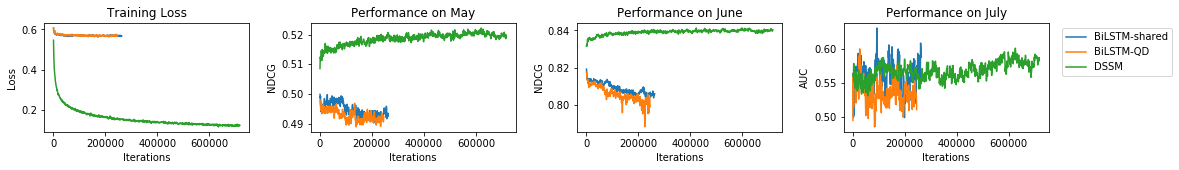

In [17]:

def read_outputs2(file_dir):
    may, june, july, loss, q_rec_loss, d_rec_loss, qd_loss, qd_rec_loss, dq_rec_loss, gan_loss, acc = [], [], [], [], [], [], [], [], [], [], []
    model_name = ""
    with open (file_dir, "r") as myfile:
        
        for line in myfile:
            s = line.split(",")
            if model_name == "":
                model_name = s[0]
            if len(s) == 3:
                break
            may.append(float(s[4].split("=")[-1]))
            june.append(float(s[5].split("=")[-1]))
            july.append(float(s[6].split("=")[-1]))
            loss.append(float(s[7].split("=")[-1]))
            
            if "qd" in model_name:
                q_rec_loss.append(float(s[8].split("=")[-1]))
                d_rec_loss.append(float(s[9].split("=")[-1]))
                qd_loss.append(float(s[10].split("=")[-1]))
            if "kate2_bpeg" in model_name or "aae" in model_name:
                q_rec_loss.append(float(s[8].split("=")[-1]))
                d_rec_loss.append(float(s[9].split("=")[-1]))
#                 qd_loss.append(float(s[10].split("=")[-1]))
#                 qd_rec_loss.append(float(s[11].split("=")[-1]))

                
                
            
            
    
            
    return model_name, may, june, july, loss, q_rec_loss, d_rec_loss, qd_loss, qd_rec_loss, dq_rec_loss, gan_loss, acc



def visualise(results, focus=[4,1,2,3], titles=["Training Loss", "Performance on May", "Performance on June", "Performance on July"], ylabels=["Loss", "NDCG", "NDCG", "AUC"], legends=None, save=None):
    width = 18
    height = 2
    plt.figure(figsize=(width, height))
    
    for i in range(4):
        plt.subplot(1, 4, i+1)
        for r in results:
            plt.plot([(i+1) * 1000 for i in range(len(r[focus[i]]))], r[focus[i]])
        plt.title(titles[i])
        plt.ylabel(ylabels[i])
        plt.xlabel('Iterations')

    if legends == None:
        plt.legend([i[0] for i in results],bbox_to_anchor=(1.04,1), loc="upper left")
    else:
        plt.legend([i for i in legends],bbox_to_anchor=(1.04,1), loc="upper left")

    
    plt.subplots_adjust(wspace=0.3)
    if save != None:
        plt.savefig('/work/png/%s' %save, bbox_inches='tight',pad_inches=1, dpi=300)
    plt.show()

run1 = read_outputs2("/work/data/out/bilstm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_18:20:53")
run2 = read_outputs2("/work/data/out/bilstm2_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_18:50:18")
run3 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:30:06")
visualise([run1, run2, run3], legends=["BiLSTM-shared", "BiLSTM-QD", "DSSM"])


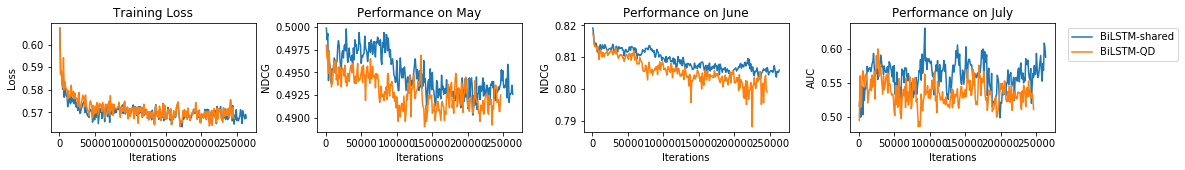

In [5]:
visualise([run1, run2], legends=["BiLSTM-shared", "BiLSTM-QD", "DSSM"])


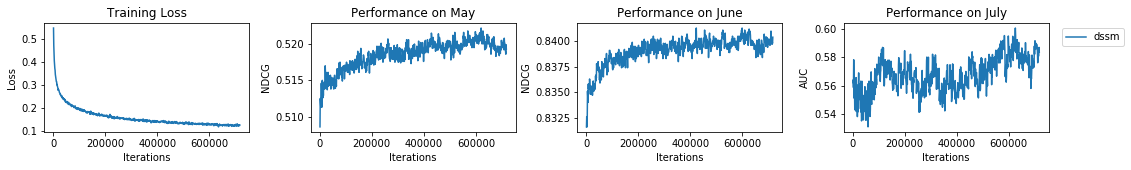

In [97]:
visualise([run3])


In [48]:
np.mean(run1[3]), np.mean(run2[3]), np.mean(run3[3])

(0.5611064638783269, 0.5357621951219511, 0.5679280334728034)

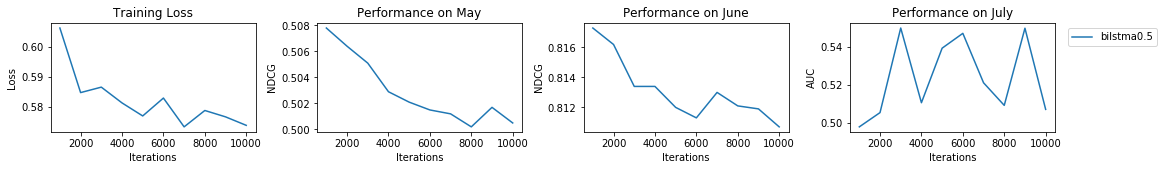

In [10]:
visualise([run23,run24])

In [7]:
run16 = read_outputs2("/work/data/out/bilstm_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_06_23:01:45")
np.mean(run16[3])

0.5238400000000001

In [41]:
np.max(run1[3])

0.6299

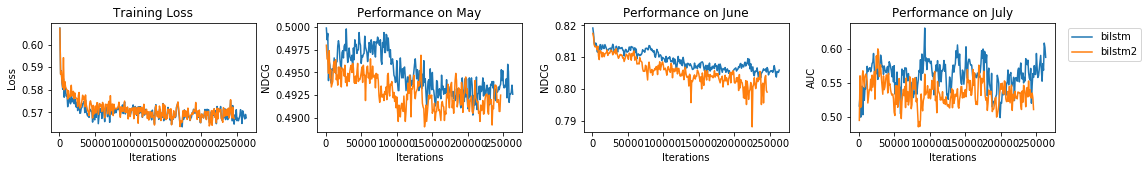

In [15]:
visualise([run1, run2])

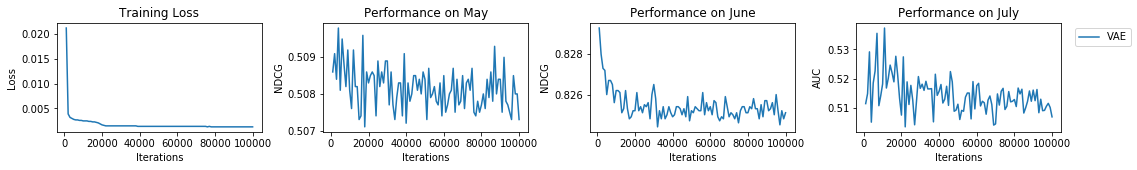

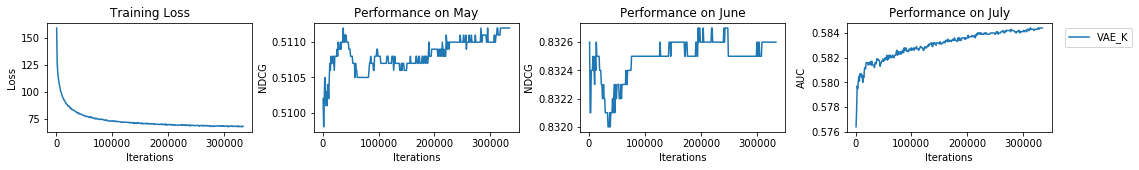

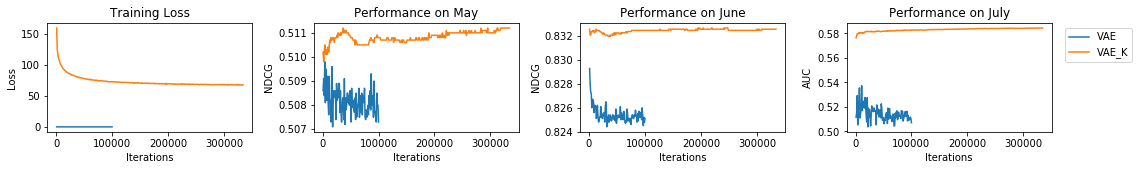

In [12]:
# without weights
run4 = read_outputs2("/work/data/out/kate1_bpe_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:27:00")
run5 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:26:38")
run6 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:28:06")
run7 = read_outputs2("/work/data/out/kate2_qdc_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:30:46")
run8 = read_outputs2("/work/data/out/kate2_qdg1_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:31:51")
# run3 = read_outputs2("/work/data/out/")
# visualise([run1, run2, run3])
visualise([run4], legends=["VAE"], save="vae")
visualise([run5], legends=["VAE_K"], save="vae_k")
visualise([run4, run5], legends=["VAE", "VAE_K"], save="vae,vae_k")

In [14]:
np.max(run5[3])

0.5844

In [294]:
def get_mean_results(runs, index):
    results = [np.mean(i[index]) for i in runs]
    for i in results:
        print(i)

# print("NDCG")
# get_mean_results([run1, run4,run5], 1)
# print("NDCG")
# get_mean_results([run1, run4,run5], 2)
# print("AUC")
# get_mean_results([run1, run4,run5], 3)


NDCG


NameError: name 'run4' is not defined

In [177]:
run9 = read_outputs2("/work/data/out/kate2_qd")
run10 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a0.1_50K_BPE_30M_QD.txt_2018_07_03_04:17:17")
run11 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a0.9_50K_BPE_30M_QD.txt_2018_07_03_04:16:18")
run12 = read_outputs2("/work/data/out/kate2_qdg1_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_03_05:30:50")
run13 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_03_04:21:08")
run14 = read_outputs2("/work/data/out/kate2_qdc_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_03_05:30:07")


In [163]:
print("NDCG")
get_mean_results([run9, run10, run11, run12, run14], 1)
print("NDCG")
get_mean_results([run9, run10, run11, run12, run14], 2)
print("AUC")
get_mean_results([run9, run10, run11, run12, run14], 3)

NDCG
0.49771411764705886
0.49938720930232566
0.4972666666666667
0.497372602739726
0.4992591836734694
NDCG
0.8113141176470587
0.8155186046511629
0.8108440476190478
0.8121164383561644
0.8155469387755101
AUC
0.5302847058823529
0.5392639534883722
0.5325035714285714
0.5442027397260274
0.5441020408163265


In [164]:
print("NDCG")
get_mean_results([run1, run2], 1)
print("NDCG")
get_mean_results([run1, run2], 2)
print("AUC")
get_mean_results([run1, run2], 3)

NDCG
0.4947908745247148
0.49288089430894305
NDCG
0.8089813688212928
0.8058158536585366
AUC
0.5611064638783269
0.5357621951219511


In [17]:
run15 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_04_23:09:00")


### BiLSTM2 concat vs cosine

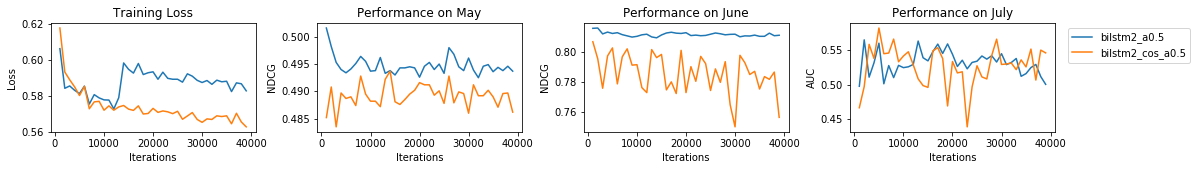

In [27]:
run20 = read_outputs2("/work/data/out/bilstm2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_01:22:32")
run21 = read_outputs2("/work/data/out/bilstm2_cos_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_01:24:06")

visualise([run20, run21])

### KATE2_QD vs KATE2_QD2 

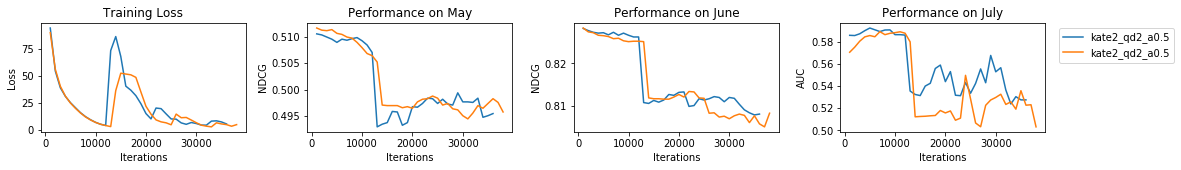

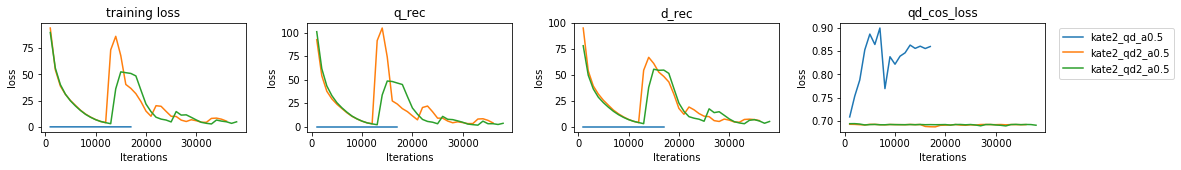

In [58]:
run22 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD.txt_2018_07_06_23:50:55")
run23 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_00:40:50")
run24 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD.txt_2018_07_07_00:06:01")

visualise([run23,run24])
visualise([run22, run23,run24], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

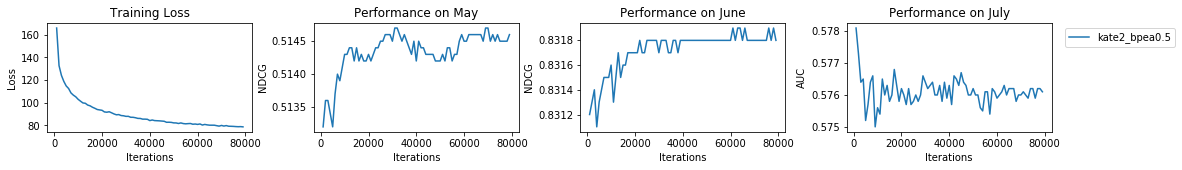

In [55]:
run25 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_06_22:45:37")
run26 = read_outputs2("/work/data/out/kate2_bpe_adam_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_06_22:45:46")

visualise([run25])

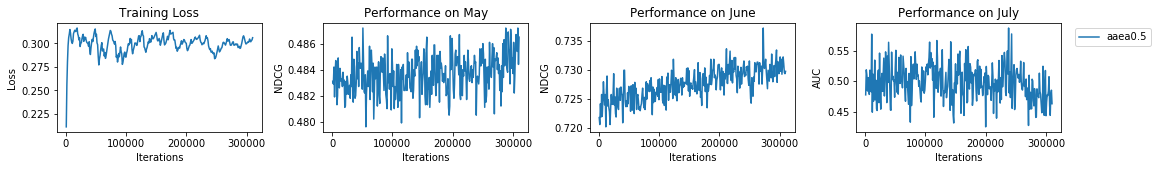

In [48]:
run27 = read_outputs2("/work/data/out/aae_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_04_22:59:56")

visualise([run27])

In [133]:
len(run27)

11

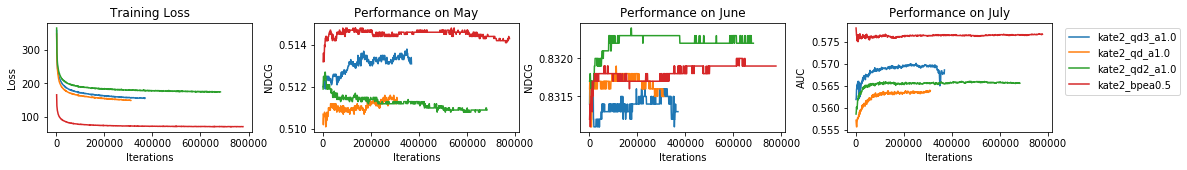

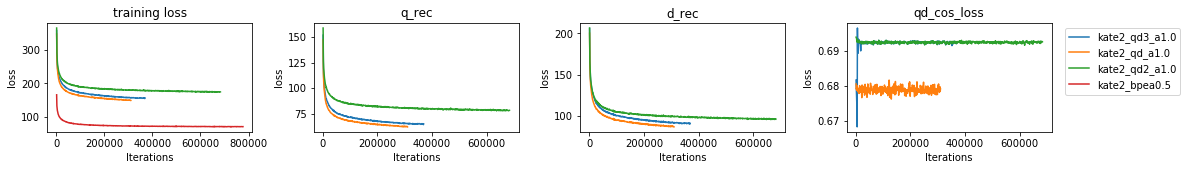

In [103]:
run27 = read_outputs2("/work/data/out/kate2_qd3_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f9e6492c6d8>_50K_BPE_30M_QD_lower2.txt_2018_07_07_05:58:15")
run28 = read_outputs2("/work/data/out/kate2_qd_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f20bf40cc50>_50K_BPE_30M_QD_lower2.txt_2018_07_07_06:00:48")
run29 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f68613d86d8>_50K_BPE_30M_QD_lower2.txt_2018_07_07_07:43:57")
run30 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_a0.5_50K_BPE_30M_QD.txt_2018_07_06_22:45:37")
visualise([run27,run28,run29, run30])
visualise([run27, run28, run29, run30], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

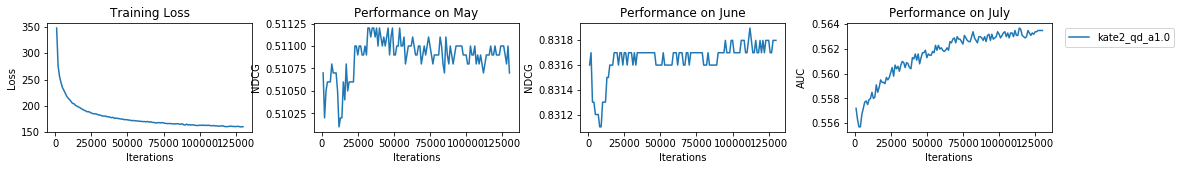

In [85]:
visualise([run28])

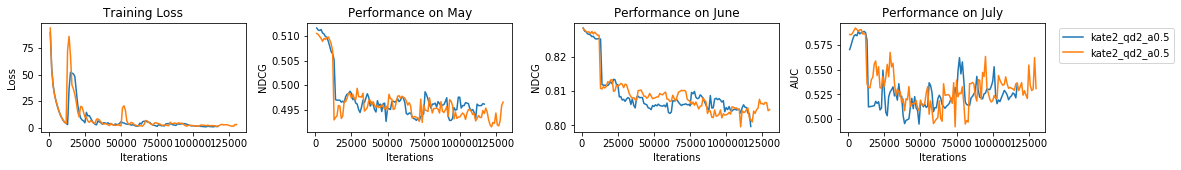

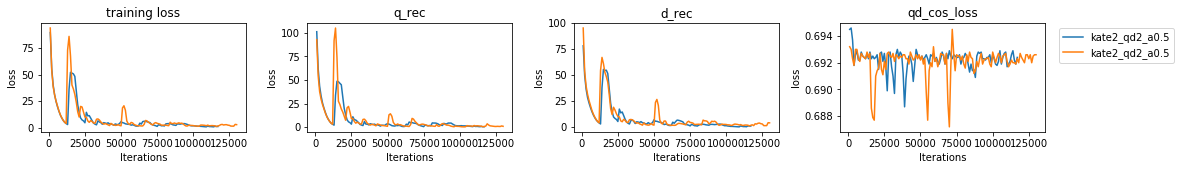

In [69]:
run27 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD.txt_2018_07_07_00:06:01")
run28 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_00:40:50")
visualise([run27,run28])
visualise([run27, run28], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

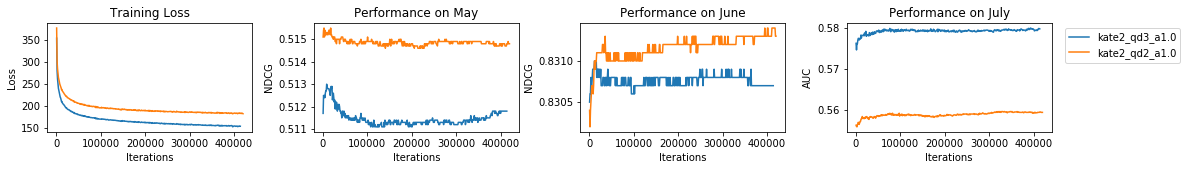

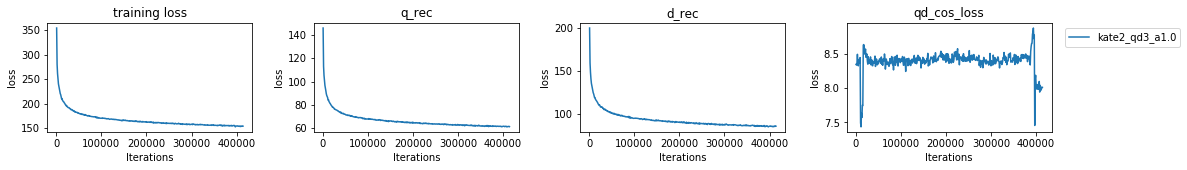

In [68]:
run31 = read_outputs2("/work/data/out/kate2_qd3_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7fd6fc3146a0>_50K_BPE_30M_QD_lower2.txt_2018_07_08_10:25:44")
run32 = read_outputs2("/work/data/out/kate2_qd2_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f36eadf36a0>_50K_BPE_30M_QD_lower2.txt_2018_07_08_10:33:47")

visualise([run31,run32])
visualise([run31], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

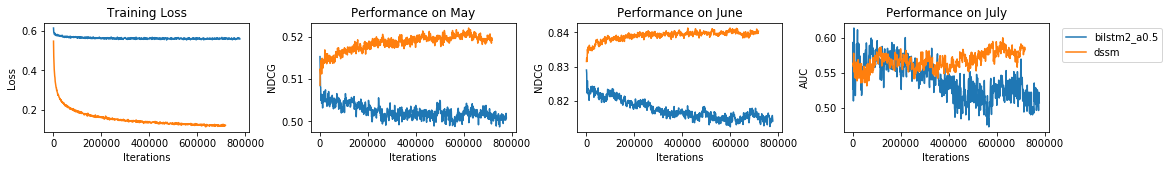

In [67]:
run33 = read_outputs2("/work/data/out/bilstm2_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_QD_lower.txt_2018_07_07_04:10:14")

visualise([run33,run3])


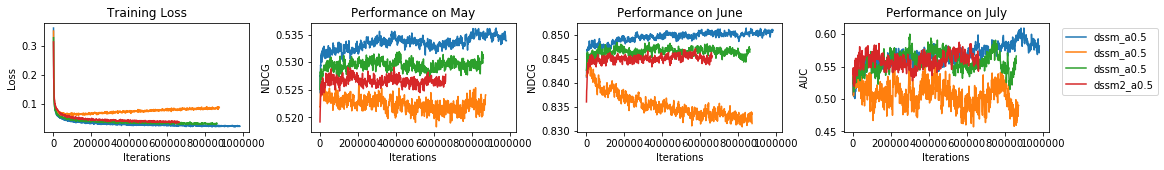

In [102]:
# adadelta default
run34 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_EN_pos_qd_log_2018_07_09_21:50:46")
# adam
run35 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_a0.5_adam_50K_BPE_30M_EN_pos_qd_log_2018_07_09_21:54:13")
# adadelta lt = 2
run36 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_a0.5_<keras.optimizers.Adadelta object at 0x7f97c8de9c88>_50K_BPE_30M_EN_pos_qd_log_2018_07_09_22:12:27")
# separate user and query encoder
run39 = read_outputs2("/work/data/out/dssm2_h300_l128_n1_ml10_w50509_b32_a0.5_<keras.optimizers.Adadelta object at 0x7fe7363aa668>_50K_BPE_30M_EN_pos_qd_log_2018_07_10_19:57:41")
visualise([run34,run35, run36, run39])


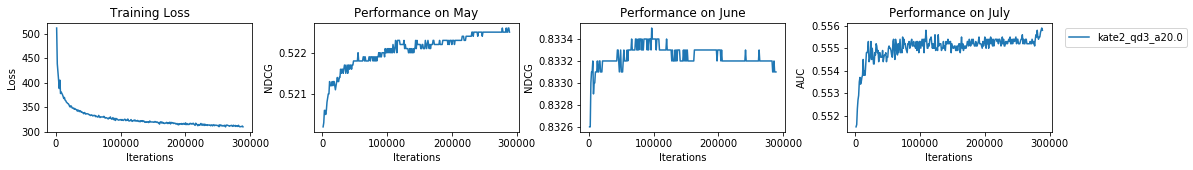

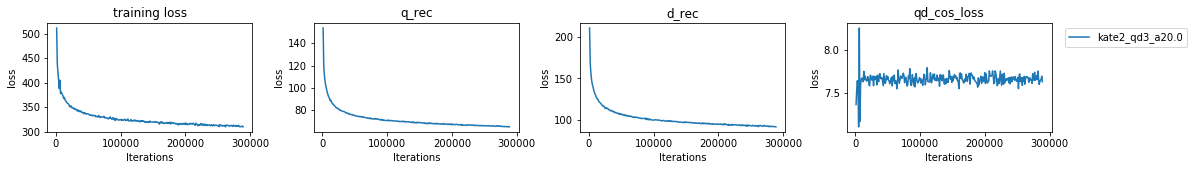

In [87]:
run37 = read_outputs2("/work/data/out/kate2_qd3_h300_l128_n1_ml10_w50509_b32_a20.0_<keras.optimizers.Adadelta object at 0x7fd51ea01710>_50K_BPE_30M_QD_lower2.txt_2018_07_09_22:33:38")
visualise([run37])
visualise([run37], focus=[4,5,6,7], titles=["training loss", "q_rec", "d_rec", "qd_cos_loss"], ylabels=["loss", "loss", "loss", "loss"])

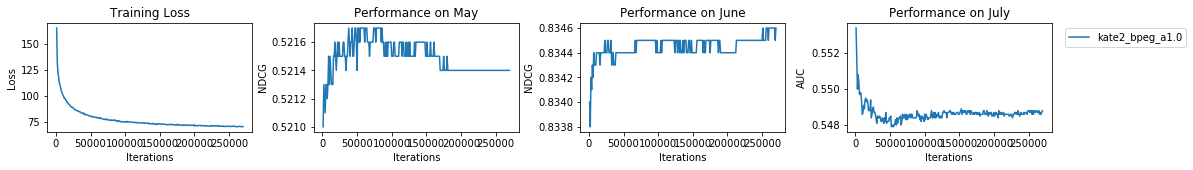

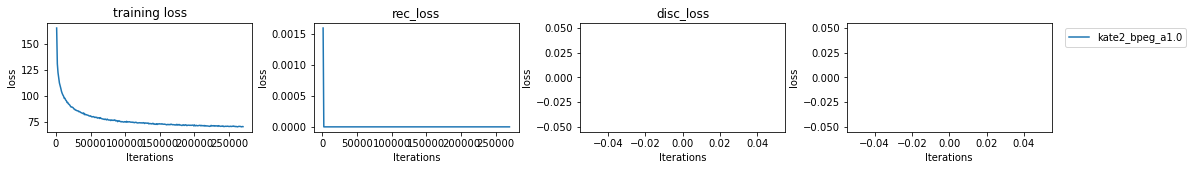

In [91]:
run38 = read_outputs2("/work/data/out/kate2_bpeg_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f0c3a404160>_50K_BPE_30M_QD_lower2.txt_2018_07_10_06:36:01")
visualise([run38])
visualise([run38], focus=[5,6,7,8], titles=["training loss", "rec_loss", "disc_loss", ""], ylabels=["loss", "loss", "loss", "loss"])

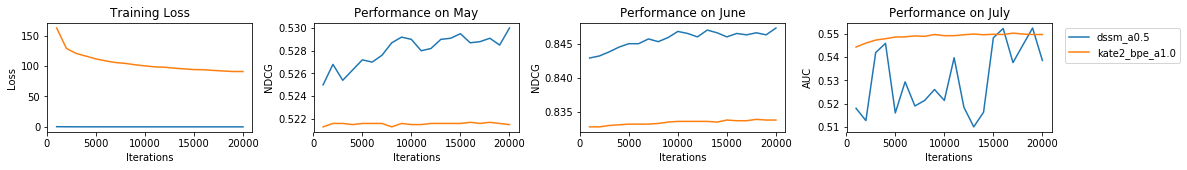

In [97]:
run40 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_a0.5_<keras.optimizers.Adadelta object at 0x7f7d38c5e390>_50K_BPE_30M_EN_pos_qd_log_2018_07_11_19:26:36")
run41 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_a1.0_<keras.optimizers.Adadelta object at 0x7f572555cf28>_50K_BPE_30M_QD_lower2.txt_2018_07_11_19:22:51")
visualise([run40,run41])


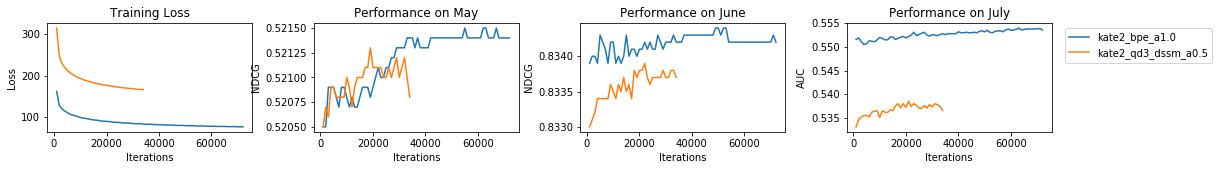

In [85]:
run40 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_n1_ml10_w50509_b32_e25_a1.0_<keras.optimizers.Adadelta object at 0x7f0d8e323be0>_50K_BPE_30M_QD_lower2.txt_2018_07_12_14:09:56")
run41 = read_outputs2("/work/data/out/kate2_qd3_dssm_h300_l128_n1_ml10_w50509_b32_e25_a0.5_<keras.optimizers.Adadelta object at 0x7f1ba650fef0>_50K_BPE_30M_EN_pos_qd_log_2018_07_12_14:11:21")

visualise([run40, run41])

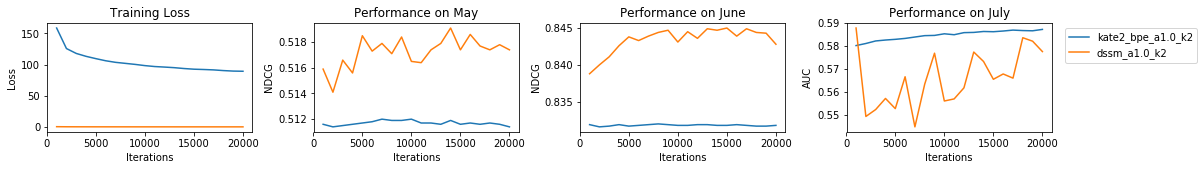

In [111]:
run42 = read_outputs2("/work/data/out/kate2_bpe_h300_l128_k2_n1_ml10_w50509_b32_e5_a1.0_<keras.optimizers.Adadelta object at 0x7f68ee833ba8>_50K_BPE_30M_QD_lower2.txt_2018_07_13_19:05:00")
run43 = read_outputs2("/work/data/out/dssm_h300_l128_k2_n1_ml10_w50509_b32_e5_a1.0_<keras.optimizers.Adadelta object at 0x7fd940e20ba8>_50K_BPE_30M_QD_lower2.txt_2018_07_13_19:11:05")
visualise([run42, run43])

In [463]:
# feay
def read_outputs2(file_dir, isOld=True):
    results = {}
    
    may, june, july, loss, q_rec_loss, d_rec_loss, qd_loss, qd_rec_loss, dq_rec_loss, gan_loss, acc, v_loss = [], [], [], [], [], [], [], [], [], [], [], []
    model_name = ""
    with open (file_dir, "r") as myfile:
        
        for line in myfile:
            s = line.split(",")
            if model_name == "":
                model_name = s[0]
            if len(s) == 3:
                break
            
            start_at = 3 if isOld else 4
            
            for i in range(start_at, len(s), 1):
                val_name = s[i].split("=")[0].replace(" ", "")
                val = s[i].split("=")[-1]
                
                if val_name in results:
                    results[val_name].append(float(val))
                else:
                    results[val_name] = []
                    results[val_name].append(float(val))
    
    if "Loss" in results.keys():
        results["loss"] = results.pop("Loss")
        results["val_loss"] = results.pop("V_Loss")
    
    
    
    return model_name, results, list(results.keys())
    
            
#     return model_name, may, june, july, loss, v_loss, q_rec_loss, d_rec_loss, qd_loss, qd_rec_loss, dq_rec_loss, gan_loss, acc

def meanResults(run):
    print(run[0], np.mean(run[1]['May']), np.mean(run[1]['June']), np.mean(run[1]['July']))
def maxResults(run):
    print(run[0], np.max(run[1]['May']), np.max(run[1]['June']), np.max(run[1]['July']))

def visualise(results, focus=["loss", "val_loss", "May", "June", "July"], legends=None, save=None, earlyStop=None):
    
    width = 18
    height = 2
    
    plt.figure(figsize=(width, height))
    
    plt_num = len(focus)
    
    for i in range(plt_num):
        plt.subplot(1, plt_num, i+1)
        
        for r in results:
            if earlyStop != None:
                plt.plot([(i+1) for i in range(earlyStop)], r[1][focus[i]][:earlyStop])
            else:
                plt.plot([(i+1) for i in range(len(r[1][focus[i]]))], r[1][focus[i]])
                
        plt.title(focus[i])
        plt.xlabel('Iterations')
        
        

    if legends == None:
        plt.legend([i[0] for i in results],bbox_to_anchor=(1.04,1), loc="upper left")
    else:
        plt.legend([i for i in legends],bbox_to_anchor=(1.04,1), loc="upper left")


    plt.subplots_adjust(wspace=0.3)
    if save != None:
        plt.savefig('/work/png/%s' %save, bbox_inches='tight',pad_inches=1, dpi=300)
    plt.show()

# run1 = read_outputs2("/work/data/out/bilstm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_18:20:53")
# run2 = read_outputs2("/work/data/out/bilstm2_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_18:50:18")
# run3 = read_outputs2("/work/data/out/dssm_h300_l128_n1_ml10_w50509_b32_50K_BPE_30M_QD.txt_2018_07_02_21:30:06")
# visualise([run1, run2, run3], legends=["BiLSTM-shared", "BiLSTM-QD", "DSSM"])


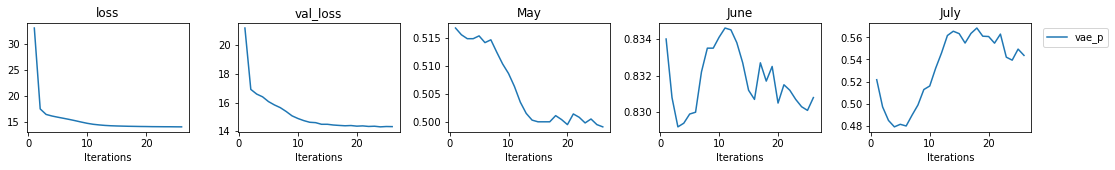

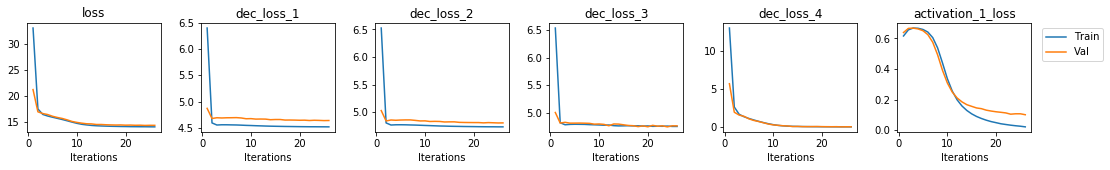

In [19]:
# compare train of val of the model
def visualise_train_val(run, focus1, focus2):
    
    res1, res2 = {}, {}
    for i, j in zip(focus1, focus2):
        res1[i] = run[1][i]    
        res2[i] = run[1][j]
    
    r1 = run[0], res1
    r2 = run[0], res2
    
    visualise([r1, r2], focus=focus1, legends=["Train", "Val"])
run54 = read_outputs2("/work/data/out/vae_dssm2_QueryQueryLog_2018_07_24_17:20:58_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7fec25fb76a0>_50K_BPE")
visualise([run54], legends=["vae_p"])
visualise_train_val(run54, run54[2][9:], run54[2][3:9])

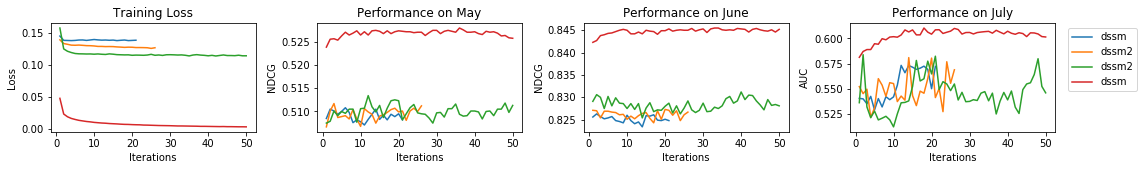

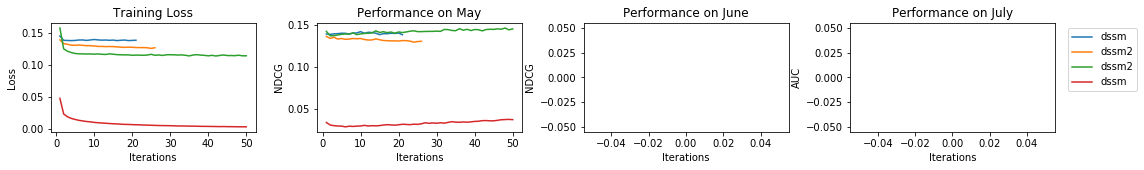

In [59]:
# QueryQueryLog
run44 = read_outputs2("/work/data/out/dssm_h300_l128_k2_n1_ml10_w50510_b128_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f4f96c47f98>_50K_BPE_30M_QD_lower2.txt_2018_07_22_05:21:44")
run45 = read_outputs2("/work/data/out/dssm2_h300_l128_k2_n1_ml10_w50510_b128_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f537204d828>_50K_BPE_30M_QD_lower2.txt_2018_07_22_00:20:33")
run46 = read_outputs2("/work/data/out/dssm_QueryQueryLog_2018_07_22_20:20:04_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f5d5233df28>_50K_BPE")

visualise([run44, run45, run42,run46])
visualise([run44, run45, run42, run46], focus=[4,5,6,7])

W2V Performance (0.5238491995915288, 0.842635055385324, 0.5427739109164091)


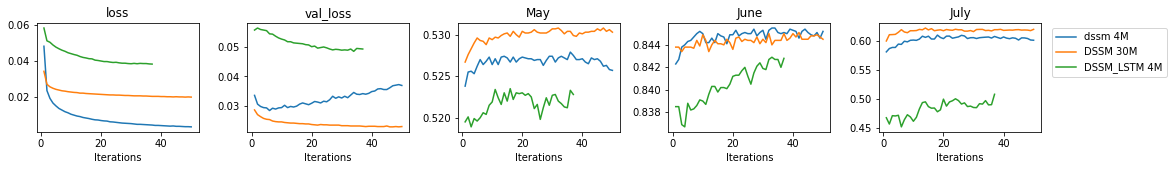

In [423]:
run46 = read_outputs2("/work/data/out/dssm_QueryQueryLog_2018_07_22_20:20:04_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f5d5233df28>_50K_BPE")
run47 = read_outputs2("/work/data/out/dssm_lstm_QueryQueryLog_2018_07_22_20:19:12_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f52100b3f60>_50K_BPE")
run48 = read_outputs2("/work/data/out/dssm_30M_QD_lower2.txt_2018_07_22_22:37:39_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f5ee9731f98>_50K_BPE")

visualise([run46, run48, run47], legends=["dssm 4M", "DSSM 30M", "DSSM_LSTM 4M"])

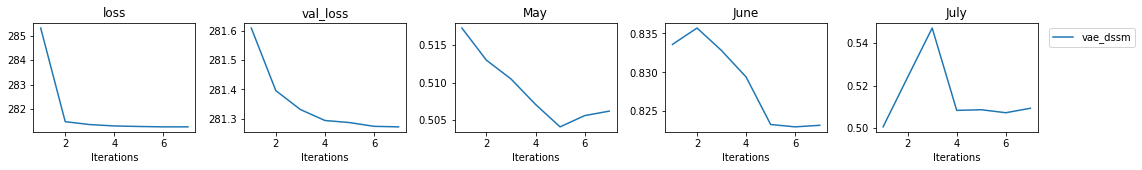

In [422]:
run49 = read_outputs2("/work/data/out/vae_dssm_QueryQueryLog_2018_07_23_15:47:19_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7ff41d6bc828>_50K_BPE")
visualise([run49])

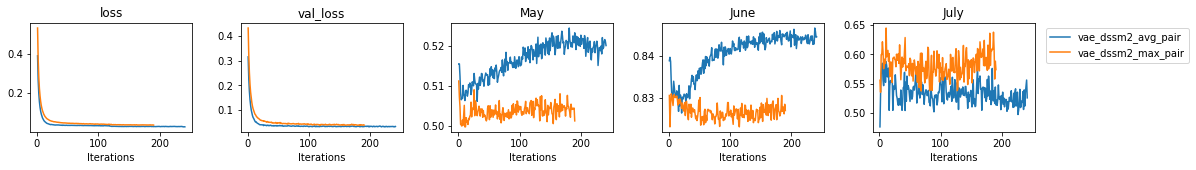

In [844]:
# run50 = read_outputs2("/work/data/out/kate_QueryLog_2018_07_23_06:49:15_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7ff098e5f828>_50K_BPE")
# run51 = read_outputs2("/work/data/out/vae_dssm_QueryQueryLog_2018_07_23_15:47:19_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7ff41d6bc828>_50K_BPE")
visualise([run50, run51])

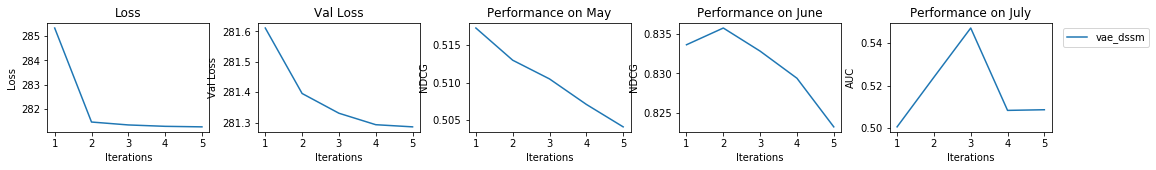

In [96]:
run51 = read_outputs2("/work/data/out/vae_dssm_QueryQueryLog_2018_07_23_15:47:19_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7ff41d6bc828>_50K_BPE")
visualise([run51])

KeyError: 'kl_loss'

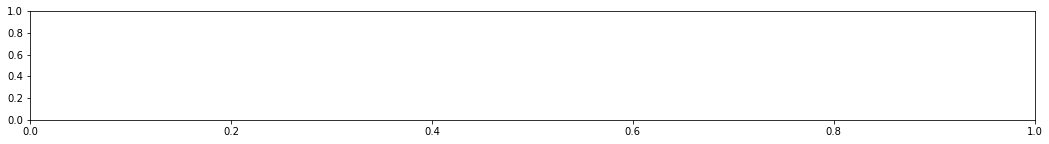

In [874]:
visualise([run99], focus=["kl_loss"])

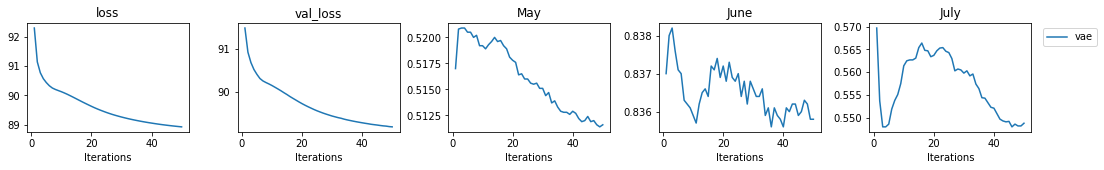

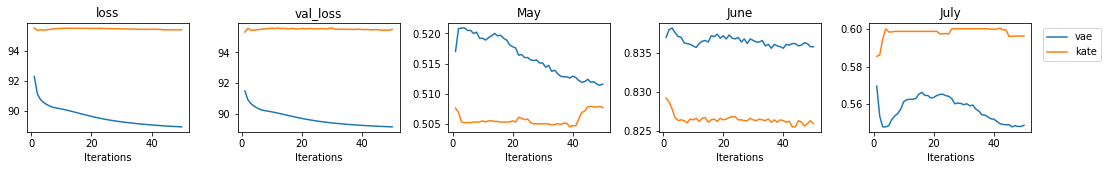

In [416]:
run52 = read_outputs2("/work/data/out/vae_QueryLog_2018_07_23_14:17:53_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7fcd901647f0>_50K_BPE")
run53 = read_outputs2("/work/data/out/kate_QueryLog_2018_07_23_06:49:15_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7ff098e5f828>_50K_BPE")
visualise([ run52], legends=["vae"])
visualise([ run52, run53], legends=["vae", "kate"])

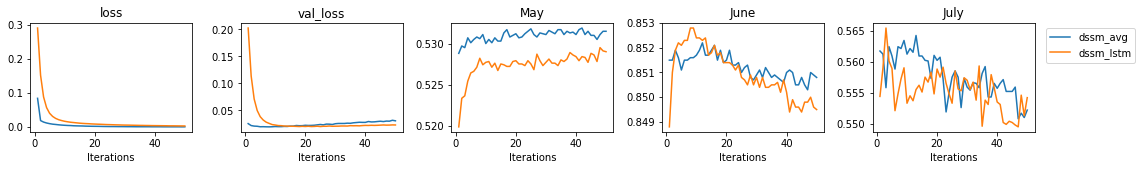

In [421]:
run60 = read_outputs2("/work/data/out/dssm_avg_QueryQueryLog_2018_07_24_21:51:53_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f18729e1860>_50K_BPE")
run61 = read_outputs2("/work/data/out/dssm_lstm_QueryQueryLog_2018_07_23_14:09:16_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f8a7b217fd0>_50K_BPE")

visualise([ run60, run61], legends=["dssm_avg", "dssm_lstm"])


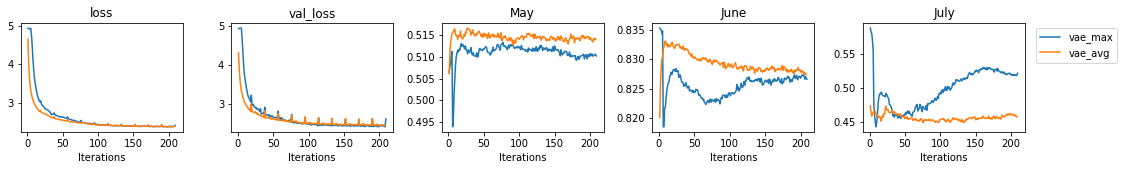

In [393]:
run64 = read_outputs2("/work/data/out/vae_max_QueryLog_2018_07_25_00:49:11_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f029fda0908>_50K_BPE", False)
run65 = read_outputs2("/work/data/out/vae_avg_QueryLog_2018_07_25_00:49:58_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7fbe23334908>_50K_BPE", False)
run66 = read_outputs2("/work/data/out/seqvae_QueryLog_2018_07_25_01:13:29_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f749a2048d0>_50K_BPE", False)
run67 = read_outputs2("/work/data/out/seqvae_QueryLog_2018_07_25_01:49:03_h100_l50_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f537c1c17f0>_50K_BPE", False)

visualise([run64, run65])

# visualise_train_val(run62, run62[2][10:], run62[2][4:10])
# visualise_train_val(run66, run66[2][10:], run66[2][4:10])


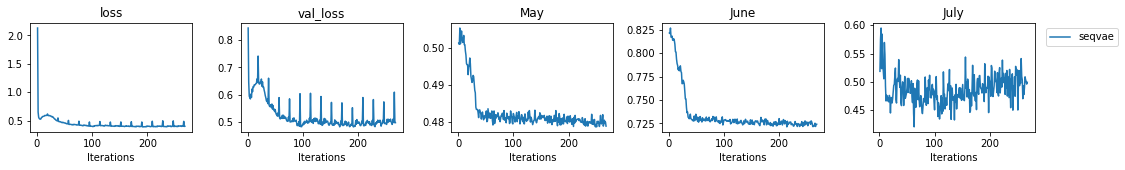

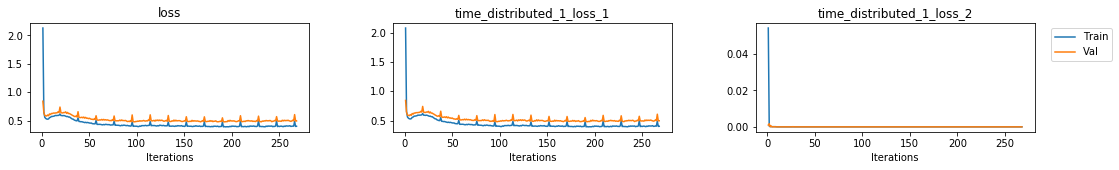

In [746]:
run66 = read_outputs2("/work/data/out/seqvae_QueryLog_2018_07_25_01:13:29_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f749a2048d0>_50K_BPE", False)
visualise([run66])
visualise_train_val(run66, run66[2][6:9], run66[2][3:6])
# visualise([run66], focus=run66[2][3:6])


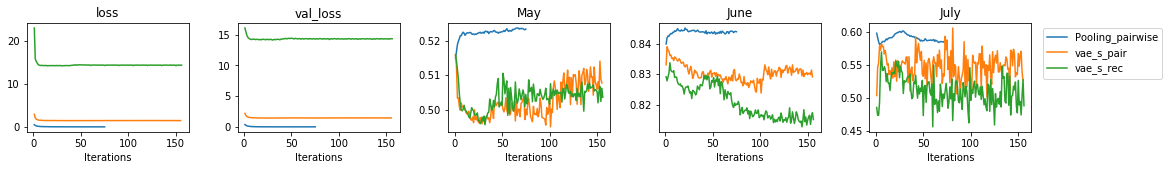

In [834]:
run69 = read_outputs2("/work/data/out/dssm_max_QueryQueryLog_2018_07_25_17:24:48_h200_l200_k2_n1_ml10_w50510_b256_e5_a1.0_<keras.optimizers.Adam object at 0x7f31bc0238d0>_50K_BPE", False)
run62 = read_outputs2("/work/data/out/vae_dssm2_max_pair_QueryQueryLog_2018_07_25_00:20:35_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f0d8eca6898>_50K_BPE", False)
run63 = read_outputs2("/work/data/out/vae_dssm2_max_rec_QueryQueryLog_2018_07_25_00:07:15_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7fc2466978d0>_50K_BPE", False)
visualise([run69, run62, run63], legends=['Pooling_pairwise', 'vae_s_pair', 'vae_s_rec'])

Losses of VAE_S_Pair (i.e. 0.9 weight for pairwise loss and 0.1 weight for reconstruction losses)


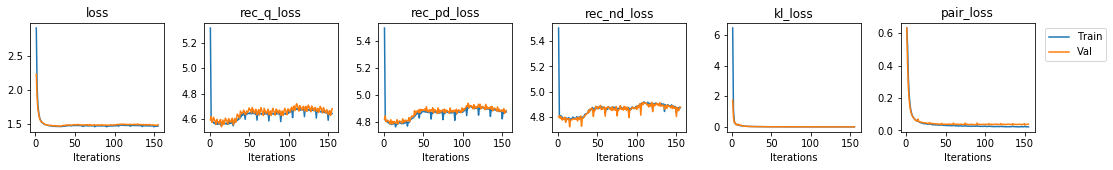

Losses of VAE_S_Rec


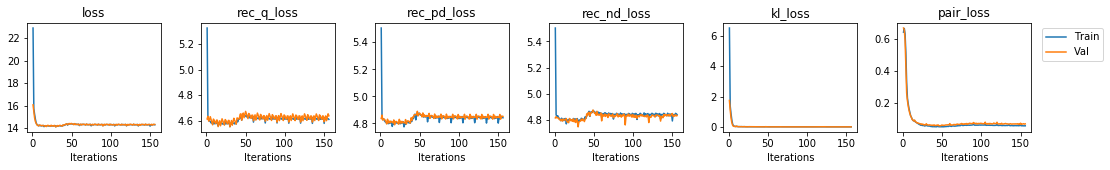

In [835]:
print("Losses of VAE_S_Pair (i.e. 0.9 weight for pairwise loss and 0.1 weight for reconstruction losses)")
visualise_train_val(run62, run62[2][9:], run62[2][3:9])
print("Losses of VAE_S_Rec")
visualise_train_val(run63, run63[2][9:], run63[2][3:9])


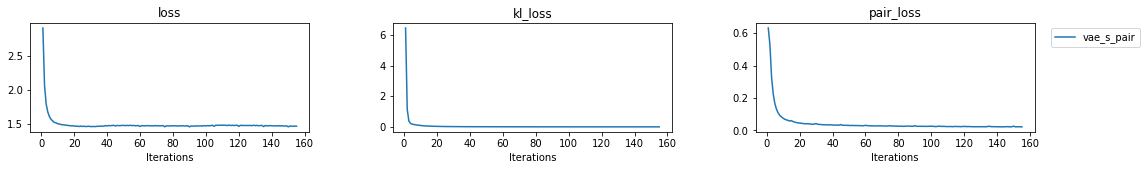

In [443]:
visualise([run62], focus=['loss', 'kl_loss', 'pair_loss'], legends=["vae_s_pair"])

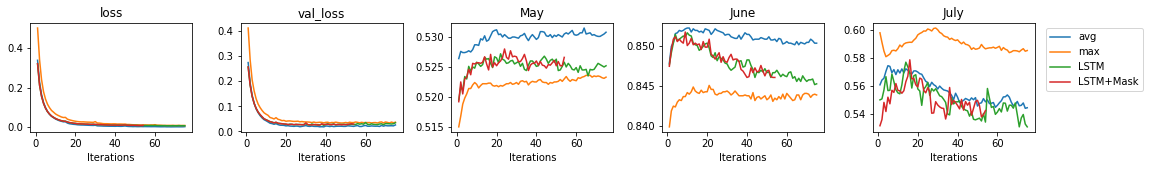

In [459]:
run68 = read_outputs2("/work/data/out/dssm_avg_QueryQueryLog_2018_07_25_17:24:40_h200_l200_k2_n1_ml10_w50510_b256_e5_a1.0_<keras.optimizers.Adam object at 0x7f2a006288d0>_50K_BPE", False)
run69 = read_outputs2("/work/data/out/dssm_max_QueryQueryLog_2018_07_25_17:24:48_h200_l200_k2_n1_ml10_w50510_b256_e5_a1.0_<keras.optimizers.Adam object at 0x7f31bc0238d0>_50K_BPE", False)
run70 = read_outputs2("/work/data/out/dssm_lstm_max_QueryQueryLog_2018_07_25_17:42:32_h200_l200_k2_n1_ml10_w50510_b256_e5_a1.0_<keras.optimizers.Adam object at 0x7fa26c95e898>_50K_BPE", False)
run73 = read_outputs2("/work/data/out/dssm_lstm_max_QueryQueryLog_2018_07_25_18:51:48_h200_l200_k2_n1_ml10_w50510_b256_e5_a1.0_<keras.optimizers.Adam object at 0x7ff4c9750908>_50K_BPE", False)

visualise([run68, run69, run70, run73], legends=["avg", "max", "LSTM", "LSTM+Mask"])

# visualise_train_val(run62, run62[2][10:], run62[2][4:10])
# visualise_train_val(run66, run66[2][10:], run66[2][4:10])


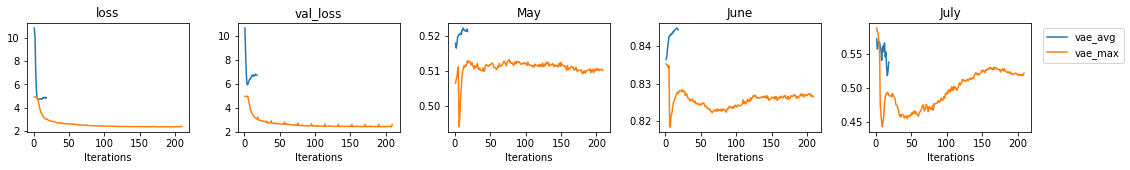

In [9]:
run71 = read_outputs2("/work/data/out/vae_avg_QueryLog_2018_07_25_02:32:42_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7fc7f1997d30>_50K_BPE", False)
run72 = read_outputs2("/work/data/out/vae_max_QueryLog_2018_07_25_00:49:11_h200_l200_k2_n1_ml10_w50510_b256_e50_a1.0_<keras.optimizers.RMSprop object at 0x7f029fda0908>_50K_BPE", False)
visualise([run71, run72])


In [12]:
def meanResults(run):
    print(run[0], np.mean(run[1]['May']), np.mean(run[1]['June']), np.mean(run[1]['July']))
    
# meanResults(run64)
# meanResults(run65)
# meanResults(run66)

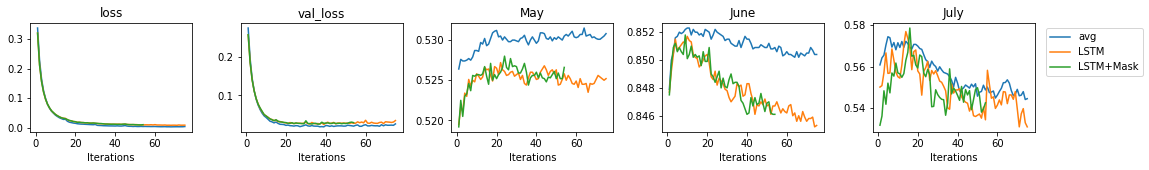

In [462]:

visualise([run68, run70, run73], legends=["avg", "LSTM", "LSTM+Mask"])

# visualise_train_val(run62, run62[2][10:], run62[2][4:10])
# visualise_train_val(run66, run66[2][10:], run66[2][4:10])


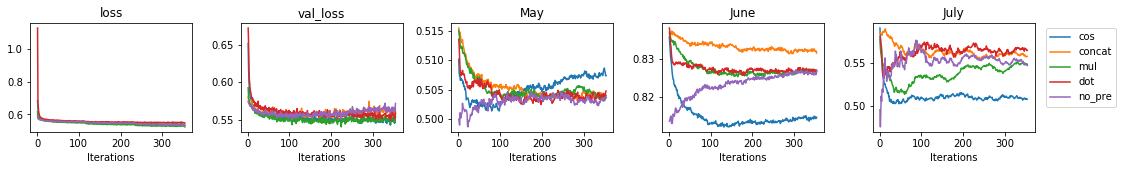

In [832]:
run74 = read_outputs2("/work/data/out/binary_max_30M_QD_2018_07_25_22:03:00_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7fa0e41951d0>_50K_BPE", False)
run73 = read_outputs2("/work/data/out/binary_max_30M_QD_2018_07_25_22:09:20_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7fde9e5999b0>_50K_BPE", False)
run75 = read_outputs2("/work/data/out/binary_max_30M_QD_2018_07_25_22:12:37_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f3909a759b0>_50K_BPE", False)
run76 = read_outputs2("/work/data/out/binary_max_30M_QD_2018_07_25_22:16:34_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7fc3262629b0>_50K_BPE", False)
run77 = read_outputs2("/work/data/out/binary_max_30M_QD_2018_07_25_22:43:08_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f49b0e179b0>_50K_BPE", False)
visualise([run74, run73, run75, run76, run77], legends=["cos", "concat", "mul", "dot", "no_pre"])


binary_max


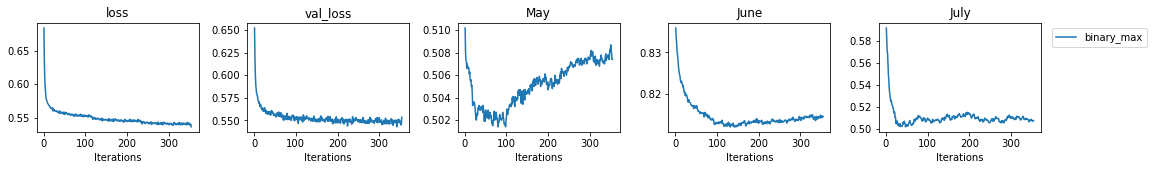

binary_max


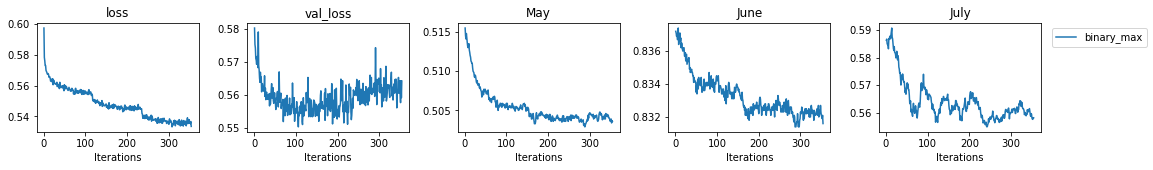

binary_max


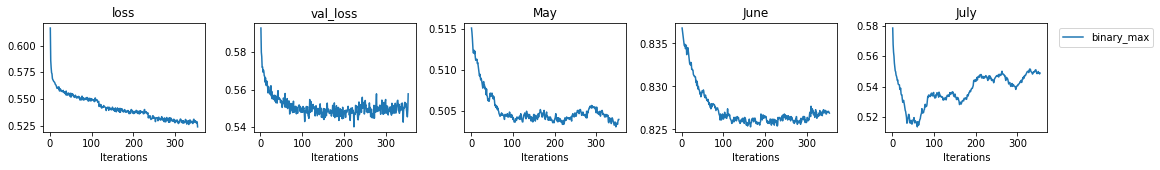

binary_max


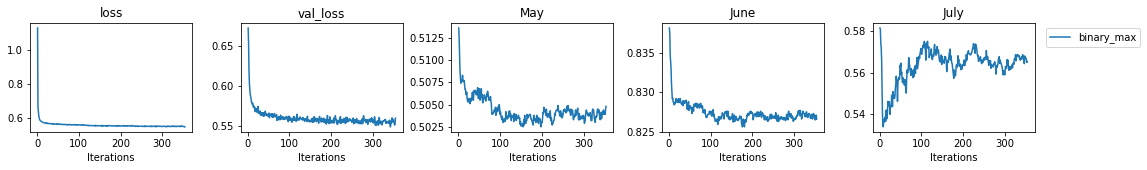

binary_max


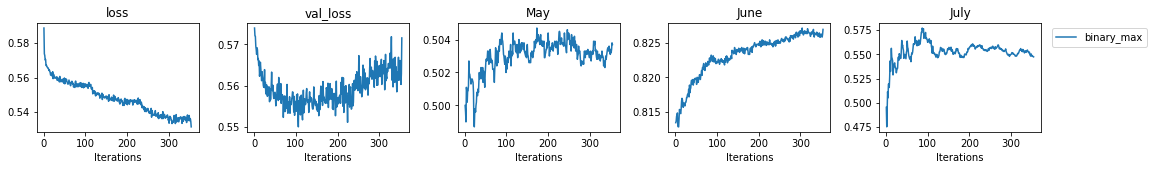

In [755]:
for i in [run74, run73, run75, run76, run77]:
    print(i[0])
    visualise([i])

In [753]:
meanResults(run77)

binary_max 0.5030234463276836 0.8232401129943503 0.5527968926553674


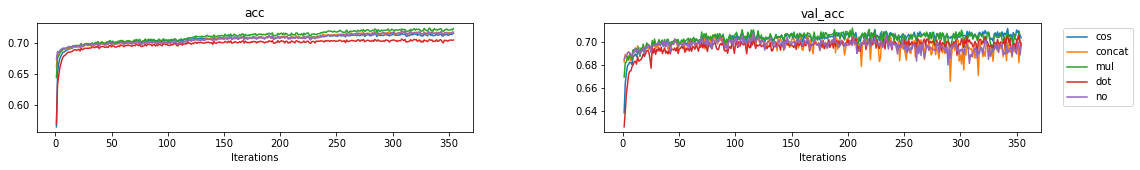

In [757]:
visualise([run74, run73, run75, run76, run77], legends=["cos", "concat", "mul", "dot", "no"], focus=["acc", "val_acc"])


In [611]:
for i in [run74, run73, run75, run76, run77, run78, run79, run87]:
    print(i[0], np.mean(i[1]['May']), np.mean(i[1]['June']), np.mean(i[1]['July']))

binary_max 0.5051655367231638 0.8146573446327684 0.5107361581920903
binary_max 0.5053830508474576 0.833274011299435 0.564190395480226
binary_max 0.5051372881355932 0.827309604519774 0.53790197740113
binary_max 0.5043533898305086 0.8273881355932203 0.5632666666666667
binary_max 0.5030234463276836 0.8232401129943503 0.5527968926553674
binary_lstm 0.4927683615819209 0.8127101694915253 0.563937570621469
dssm_avg 0.5315725988700565 0.850754802259887 0.5497717514124294
dssm_lstm_max 0.5272527027027027 0.8470493243243243 0.5517263513513514


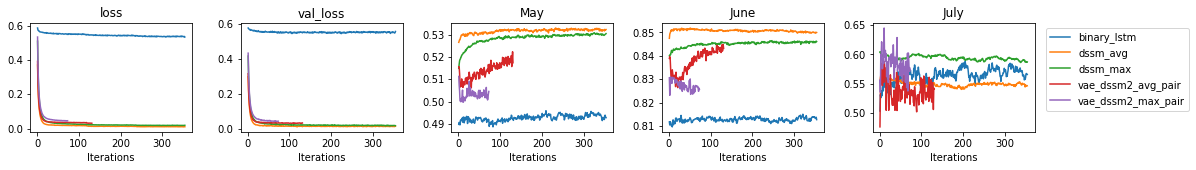

In [740]:
visualise([run78,run79,run80, run50, run51])

## DSSM_LSTM + separate Encoders

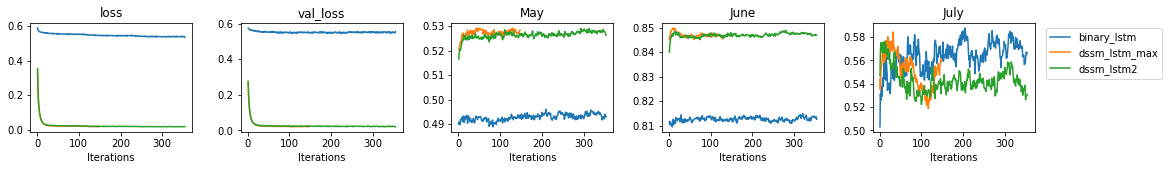

dssm_lstm2 0.5264488700564972 0.8470011299435027 0.5428302259887006


In [14]:
visualise([run78, run87, run92])
meanResults(run92)

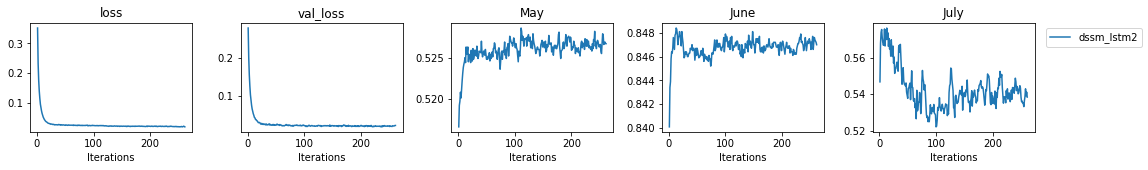

In [772]:
visualise([run92])

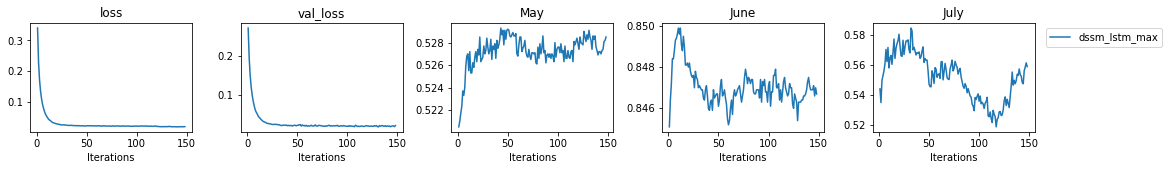

In [773]:
visualise([run87])

## VAE + Pairwise Loss Experiment

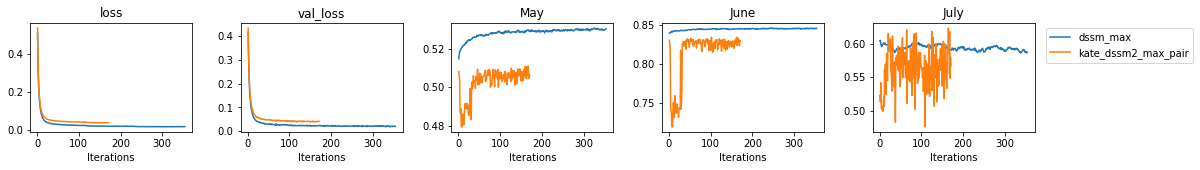

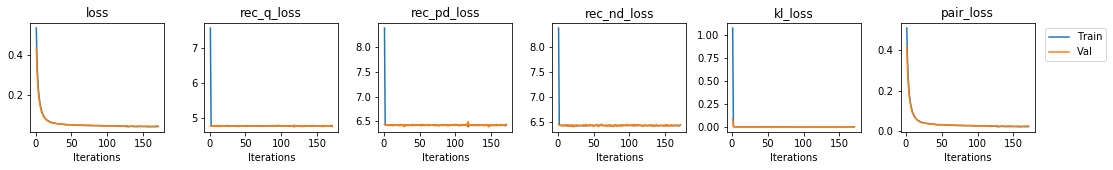

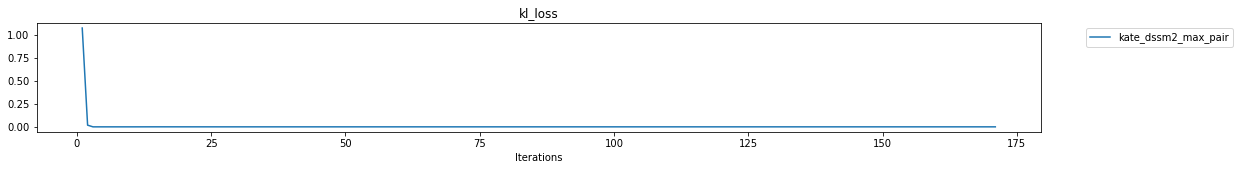

In [841]:
visualise([run80, run90])

visualise_train_val(run90, run90[2][9:], run90[2][3:9])
visualise([run90], focus=["kl_loss"], legends=[""])


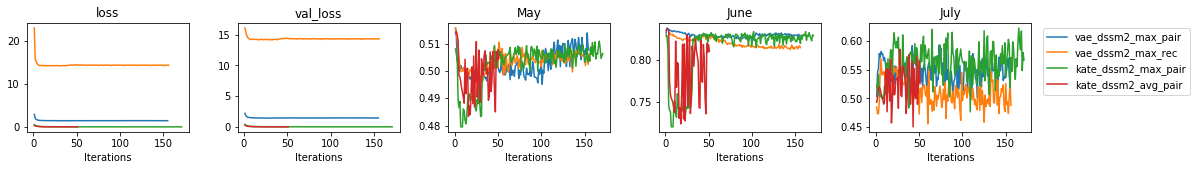

In [831]:
visualise([run62, run63, run90, run91])


In [702]:
for i in [run79, run80, run87, run91]:
    print(i[0], np.mean(i[1]['May']), np.mean(i[1]['June']), np.mean(i[1]['July']))

dssm_avg 0.5315725988700565 0.850754802259887 0.5497717514124294
dssm_max 0.5283776836158193 0.8451129943502824 0.5937889830508475
dssm_lstm_max 0.5272527027027027 0.8470493243243243 0.5517263513513514
vae_dssm2_max_pair 0.503234 0.8279820000000001 0.588236


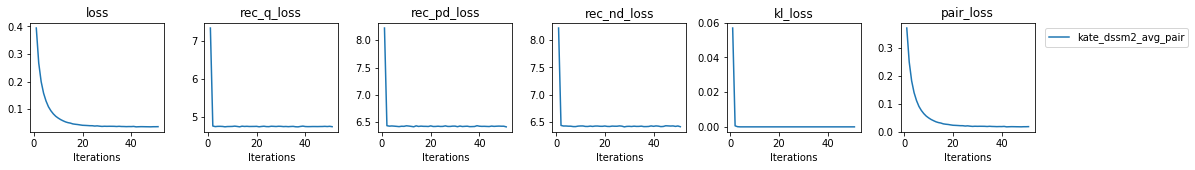

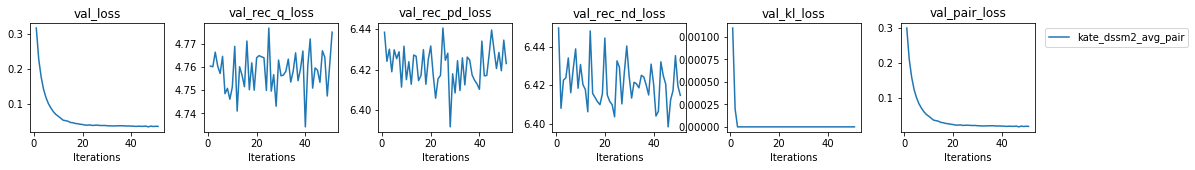

In [769]:
visualise([run91], focus=run91[2][9:])
visualise([run91], focus=run91[2][3:9])

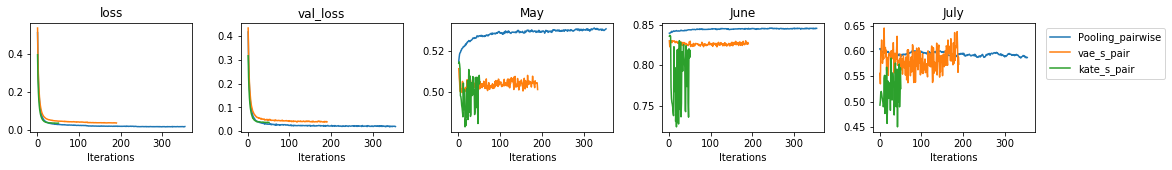

Losess of VAE_S_Pair


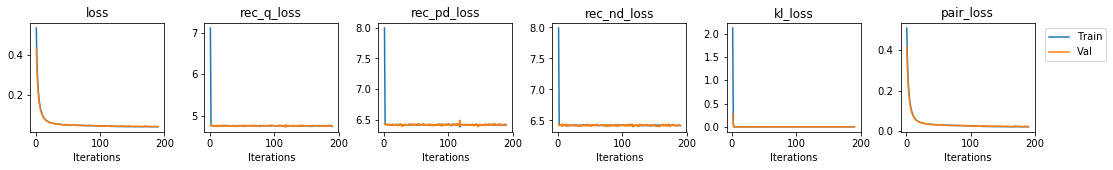

Losess of KATE_S_Pair


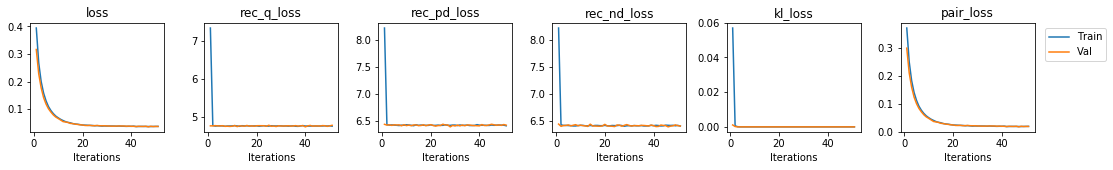

In [849]:
visualise([run80, run51, run91], legends=["Pooling_pairwise", "vae_s_pair", "kate_s_pair"])
print("Losess of VAE_S_Pair")
visualise_train_val(run51, run51[2][9:], run51[2][3:9])
print("Losess of KATE_S_Pair")
visualise_train_val(run91, run91[2][9:], run91[2][3:9])

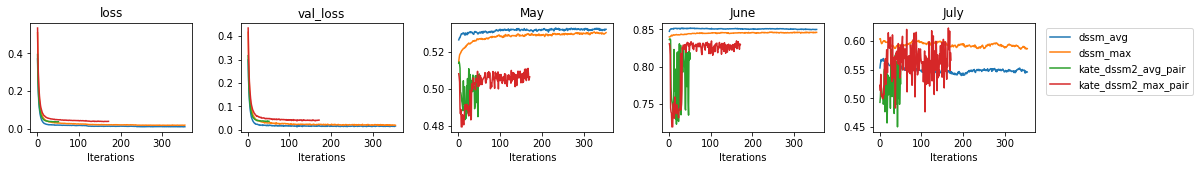

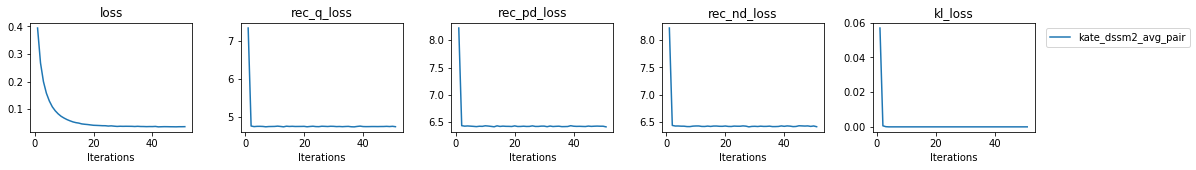

kate_dssm2_avg_pair


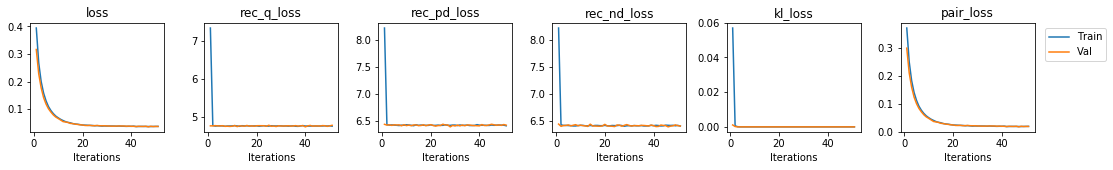

kate_dssm2_max_pair


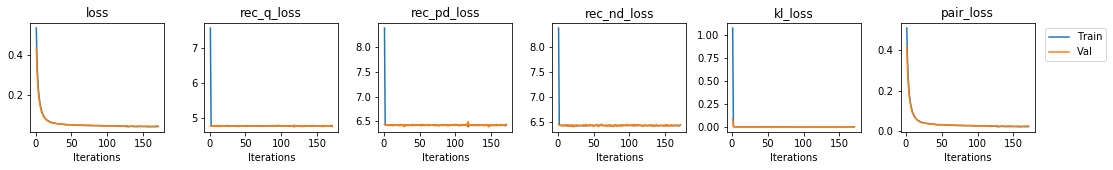

In [829]:
visualise([run79, run80,run91, run90])
visualise([run91], focus=run91[2][9:-1])
for i in [run91, run90]:
    print(i[0])
    visualise_train_val(i, i[2][9:], i[2][3:10])


In [34]:
# run = read_outputs2("", False)
run95 = read_outputs2("/work/data/out/dssm_lstm2_30M_QD_ml20_2018_07_30_03:08:53_h200_l200_k2_n1_ml20_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f0fc461d780>_50K_BPE", False)
run94 = read_outputs2("/work/data/out/seqvae_kl_1_30M_QD_2018_07_27_18:31:26_h128_l32_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7efed0095b70>_50K_BPE", False)
run93 = read_outputs2("/work/data/out/seqvae_kl_1_30M_QD_2018_07_27_17:33:31_h128_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f08077e1dd8>_50K_BPE", False)
run92 = read_outputs2("/work/data/out/dssm_lstm2_30M_QD_2018_07_27_06:43:02_h200_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7ff13c184e80>_50K_BPE", False)
run91 = read_outputs2("/work/data/out/kate_dssm2_avg_pair_30M_QD_2018_07_27_01:13:12_h128_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f59032d9d30>_50K_BPE", False)
run90 = read_outputs2("/work/data/out/kate_dssm2_max_pair_30M_QD_2018_07_27_01:11:31_h128_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7fe0a0113ef0>_50K_BPE", False)
run89 = read_outputs2("/work/data/out/seqvae_2_30M_QD_2018_07_26_23:25:04_h128_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f502c011f28>_50K_BPE", False)
run88 = read_outputs2("/work/data/out/seqvae_30M_QD_2018_07_26_22:22:02_h128_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7effa0b21a90>_50K_BPE", False)
run87 = read_outputs2("/work/data/out/dssm_lstm_max_30M_QD_2018_07_26_00:05:53_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f263ffbb198>_50K_BPE", False)
run86 = read_outputs2("/work/data/out/aae_avg_2_30M_QD_2018_07_26_21:04:54_h200_l100_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f959a01de10>_50K_BPE", False)
run85 = read_outputs2("/work/data/out/kate_avg_30M_QD_2018_07_26_20:00:18_h200_l100_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f9669eda9e8>_50K_BPE", False)
run84 = read_outputs2("/work/data/out/kate_max_30M_QD_2018_07_26_19:50:13_h200_l100_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f9efb388da0>_50K_BPE", False)
run81 = read_outputs2("/work/data/out/aae_30M_QD_2018_07_26_17:38:04_h200_l100_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f308069c9b0>_50K_BPE", False)
run82 = read_outputs2("/work/data/out/vae_avg_30M_QD_2018_07_26_18:04:09_h200_l100_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7ff92e0679e8>_50K_BPE", False)
run83 = read_outputs2("/work/data/out/vae_max_30M_QD_2018_07_26_18:08:31_h200_l100_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7ff8ed5b19b0>_50K_BPE", False)


run51 = read_outputs2("/work/data/out/vae_dssm2_max_pair_30M_QD_2018_07_26_23:28:29_h128_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f1396abbd30>_50K_BPE", False)
run50 = read_outputs2("/work/data/out/vae_dssm2_avg_pair_30M_QD_2018_07_26_16:54:17_h200_l100_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7fa1f1e00a58>_50K_BPE", False)
run78 = read_outputs2("/work/data/out/binary_lstm_30M_QD_2018_07_25_23:37:27_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f3ad54241d0>_50K_BPE", False)

run80 = read_outputs2("/work/data/out/dssm_max_30M_QD_2018_07_26_00:01:58_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7ff4b6f971d0>_50K_BPE", False)
run79 = read_outputs2("/work/data/out/dssm_avg_30M_QD_2018_07_26_00:07:07_h200_l200_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f9f138ab1d0>_50K_BPE", False)




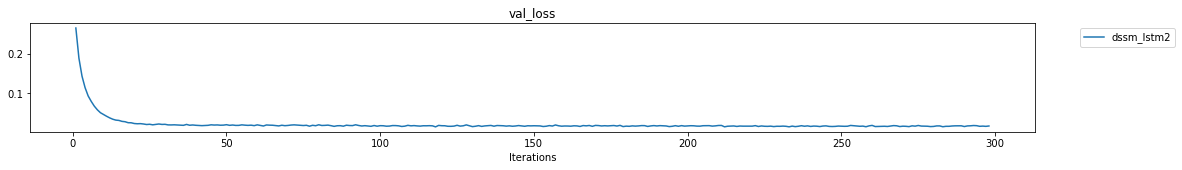

In [41]:
patient = 0
lowest = 99999
for idx, i in enumerate(run95[1]['val_loss']):
    if i < lowest:
        lowest = i
    if i > lowest:
        patient += 1
    if patient == 5:
        print(idx)
        break

28


In [42]:
26*256*1000

6656000

In [56]:
run95[1]['July']

[0.5441,
 0.5502,
 0.5483,
 0.5615,
 0.5549,
 0.5626,
 0.5508,
 0.5667,
 0.5617,
 0.5652,
 0.5672,
 0.5589,
 0.5586,
 0.5588,
 0.5647,
 0.5606,
 0.5511,
 0.5607,
 0.5664,
 0.5624,
 0.5661,
 0.5586,
 0.5595,
 0.5661,
 0.5544,
 0.5492,
 0.5604,
 0.5629,
 0.5608,
 0.5637,
 0.555,
 0.5475,
 0.5423,
 0.5433,
 0.5486,
 0.547,
 0.5561,
 0.5552,
 0.5533,
 0.5477,
 0.5481,
 0.5573,
 0.5521,
 0.553,
 0.5516,
 0.547,
 0.5533,
 0.5422,
 0.5428,
 0.545,
 0.5564,
 0.5516,
 0.551,
 0.5481,
 0.544,
 0.554,
 0.5476,
 0.5542,
 0.5567,
 0.555,
 0.5528,
 0.5559,
 0.5526,
 0.5536,
 0.5619,
 0.5626,
 0.5632,
 0.5621,
 0.5545,
 0.5544,
 0.5515,
 0.5542,
 0.5587,
 0.5611,
 0.5656,
 0.567,
 0.5651,
 0.5625,
 0.5575,
 0.5622,
 0.5636,
 0.5646,
 0.5604,
 0.5547,
 0.556,
 0.5609,
 0.5544,
 0.5563,
 0.5564,
 0.559,
 0.5525,
 0.5423,
 0.5498,
 0.5474,
 0.5435,
 0.5499,
 0.5401,
 0.5417,
 0.5414,
 0.5423,
 0.544,
 0.5372,
 0.5431,
 0.5408,
 0.5415,
 0.5366,
 0.539,
 0.5437,
 0.5393,
 0.538,
 0.5386,
 0.541,
 0.544,


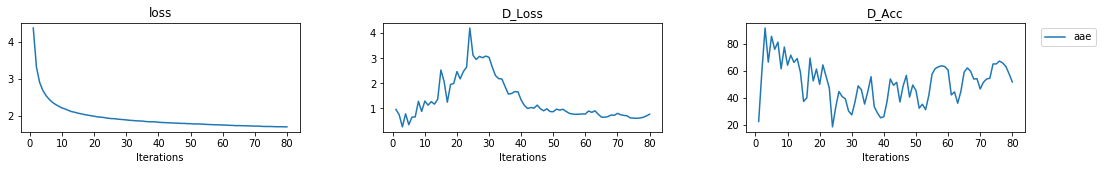

In [787]:
visualise([run81], focus=["loss", "D_Loss", "D_Acc"])


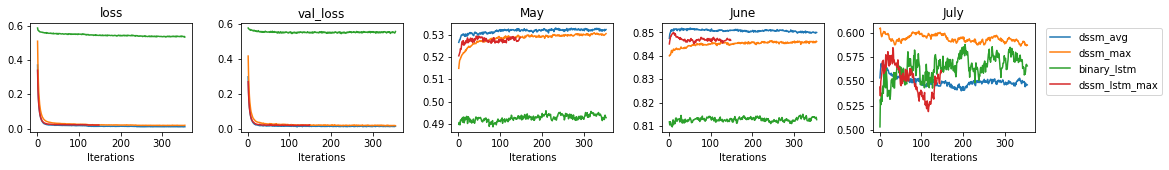

In [786]:
visualise([run79, run80, run78, run87])
# LSTM + binary classifier vs LSTM + pairwise ranking

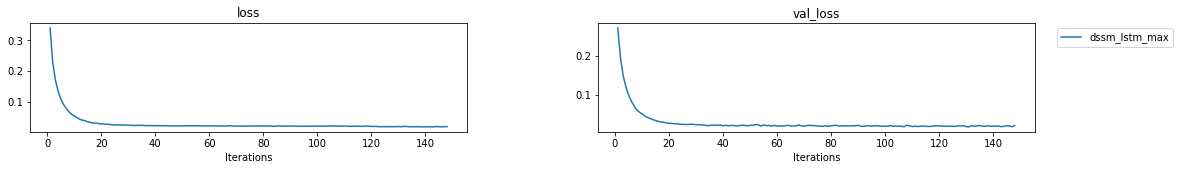

In [785]:
visualise([run87], focus=["loss", "val_loss"])

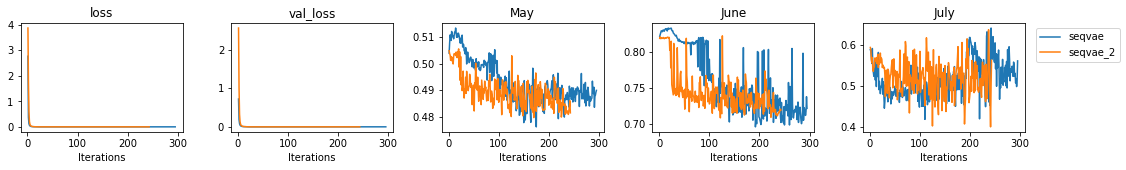

In [780]:
visualise([run88, run89])


In [788]:
run88[2]

['May',
 'June',
 'July',
 'val_loss',
 'val_rec_loss',
 'val_kl_loss',
 'loss',
 'rec_loss',
 'kl_loss']

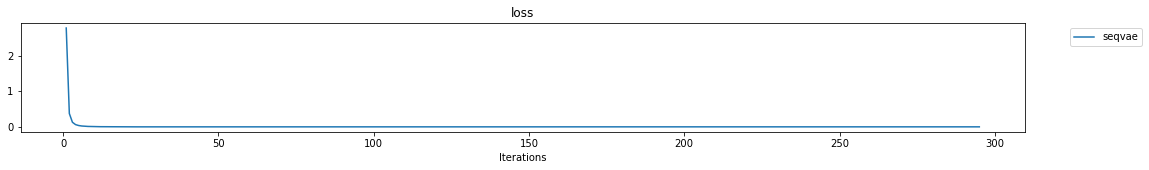

In [790]:
visualise([run88], focus=["loss"])

In [806]:
run83[0]

'vae_max'

In [801]:
run83[2]

['May',
 'June',
 'July',
 'val_loss',
 'val_rec_loss',
 'val_kl_loss',
 'loss',
 'rec_loss',
 'kl_loss']

In [827]:
run93[1]['rec_loss']

[2.7333,
 0.4405,
 0.267,
 0.2461,
 0.247,
 0.2515,
 0.253,
 0.2538,
 0.2563,
 0.2562,
 0.2569,
 0.2559,
 0.2554,
 0.2547,
 0.2543,
 0.2515,
 0.2518]

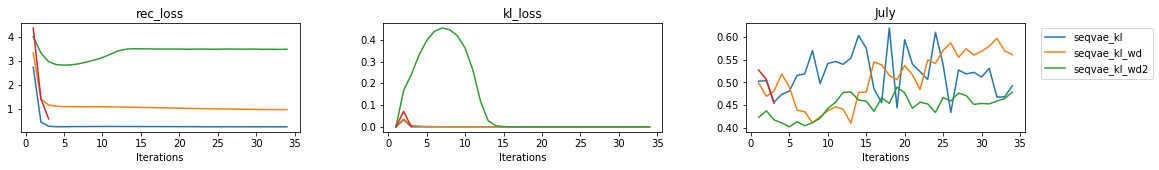

In [870]:
run93 = read_outputs2("/work/data/out/seqvae_kl_1_30M_QD_2018_07_27_17:33:31_h128_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f08077e1dd8>_50K_BPE", False)
run94 = read_outputs2("/work/data/out/seqvae_kl_1_30M_QD_2018_07_27_18:31:26_h128_l32_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7efed0095b70>_50K_BPE", False)
run95 = read_outputs2("/work/data/out/seqvae_kl_1_30M_QD_2018_07_27_20:40:48_h128_l32_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7f4588ce3ef0>_50K_BPE", False)
run96 = read_outputs2("/work/data/out/seqvae_kl_1_30M_QD_2018_07_27_17:25:55_h128_l16_k2_n1_ml10_w50510_b256_e3_a1.0_<keras.optimizers.Adam object at 0x7fca4ef47e48>_50K_BPE", False)


visualise([run93, run94, run95, run96], focus=['rec_loss','kl_loss', 'July'], legends=["seqvae_kl", "seqvae_kl_wd", "seqvae_kl_wd2"])


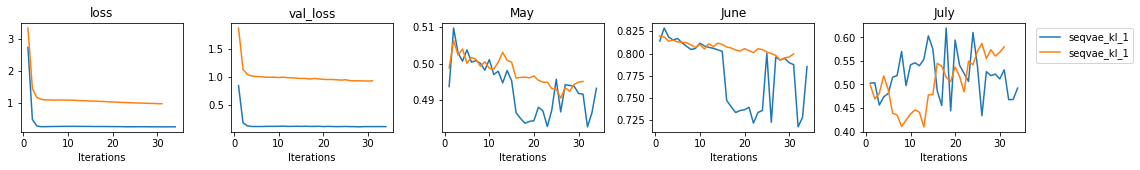

In [863]:
visualise([run93, run94])

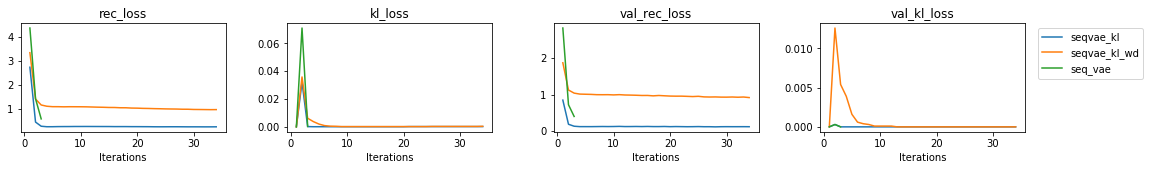

In [869]:
visualise([run93, run94, run96], focus=['rec_loss','kl_loss', 'val_rec_loss', 'val_kl_loss'], legends=["seqvae_kl", "seqvae_kl_wd", "seq_vae"])


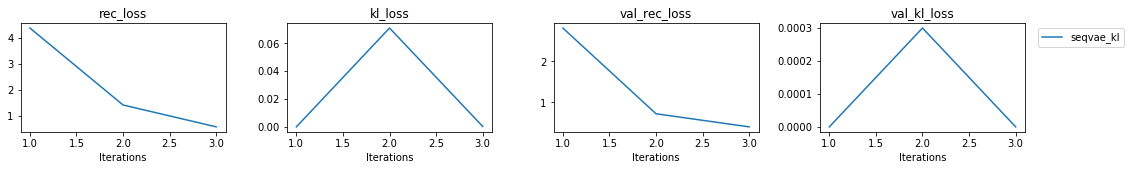

In [871]:
visualise([run96], focus=['rec_loss','kl_loss', 'val_rec_loss', 'val_kl_loss'], legends=["seqvae_kl", "seqvae_kl_wd", "seq_vae"])


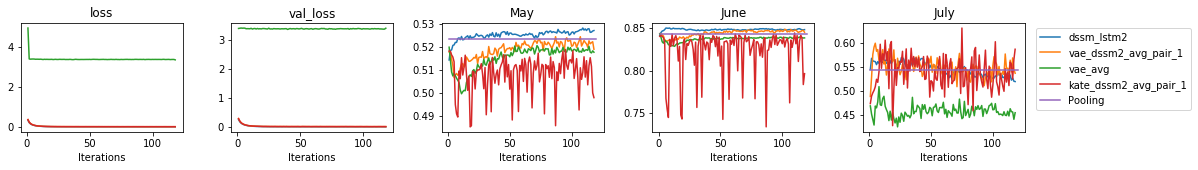

In [105]:
avg = "Pooling", {'July':[0.5428]*120, 'May':[0.5236]*120, 'June':[0.8424]*120, 'loss':[], 'val_loss':[], "Quora":[0.7041]*120, "Para":[0.9388]*120, "STS":[0.5433]*120}

run100 = read_outputs2("/work/data/out/dssm_lstm2_30M_QD_ml15_2018_07_31_05:33:08_h200_l200_k2_n1_ml15_w50511_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f7e29d22ef0>_50K_BPE", False)
run101 = read_outputs2("/work/data/out/vae_dssm2_avg_pair_1_30M_QD_ml15_2018_07_31_07:52:08_h200_l200_k2_n1_ml15_w50511_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f6a72d16358>_50K_BPE", False)
run102 = read_outputs2("/work/data/out/vae_avg_30M_QD_ml15_2018_07_31_07:32:51_h200_l200_k2_n1_ml15_w50511_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7fb201678dd8>_50K_BPE", False)
run103 = read_outputs2("/work/data/out/kate_dssm2_avg_pair_1_30M_QD_ml15_2018_07_31_07:54:24_h200_l200_k2_n1_ml15_w50511_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7fa85d0baf60>_50K_BPE", False)
run104 = read_outputs2("/work/data/out/vae_max_kl_30M_QD_ml15_2018_07_31_06:52:41_h200_l200_k2_n1_ml15_w50511_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f3f9a2b4f98>_50K_BPE", False)
run105 = read_outputs2("/work/data/out/bowvae_max_kl_30M_QD_ml15_2018_08_01_14:52:51_h200_l200_k2_n1_ml15_w50511_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f4400fa05c0>_50K_BPE", False)
visualise([run100, run101, run102, run103, avg])

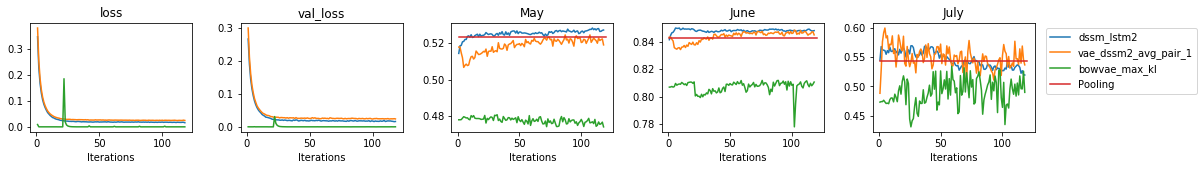

In [106]:
visualise([run100, run101, run105, avg])

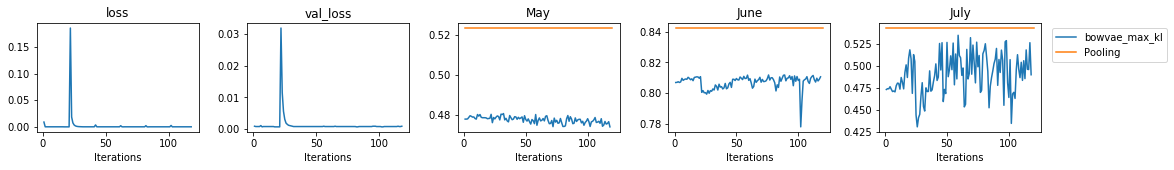

In [107]:
visualise([run105, avg])

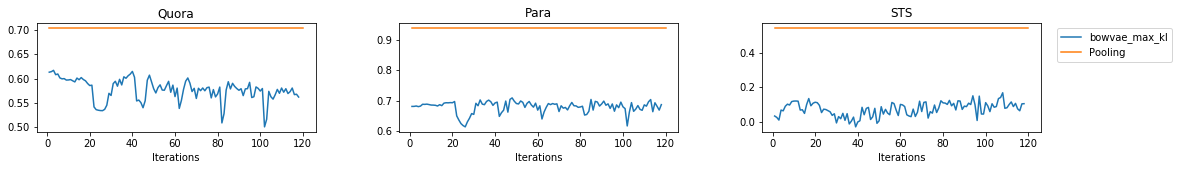

In [108]:
visualise([run105, avg], focus=["Quora", "Para", "STS"])

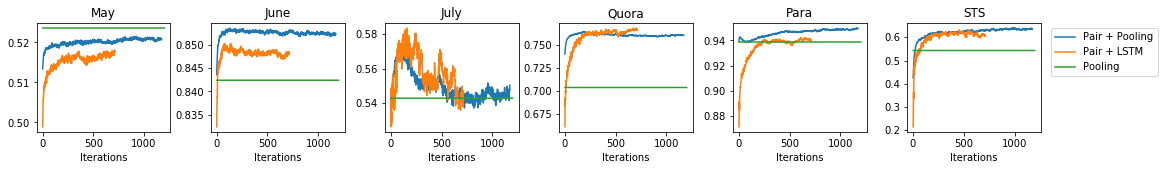

In [283]:
avg = "Pooling", {'July':[0.5428]*1200, 'May':[0.5236]*1200, 'June':[0.8424]*1200, 'loss':[], 'val_loss':[], "Quora":[0.7041]*1200, "Para":[0.9388]*1200, "STS":[0.5433]*1200}

run200 = read_outputs2("/work/data/out/dssm_avg_30M_QD_ml15_2018_08_02_21:07:38_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7ff198df9b00>_50K_BPE", False)
run201 = read_outputs2("/work/data/out/dssm_lstm2_30M_QD_ml15_2018_08_02_21:01:39_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f1c46d20ac8>_50K_BPE", False)
run202 = read_outputs2("/work/data/out/vae_avg_30M_QD_ml15_2018_08_02_21:24:06_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f06416e0b00>_50K_BPE", False)
run203 = read_outputs2("/work/data/out/vae_avg_kl_30M_QD_ml15_2018_08_02_21:31:20_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f6feb0e0b00>_50K_BPE", False)
run204 = read_outputs2("/work/data/out/binary_lstm_30M_QD_ml15_2018_08_02_22:29:17_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7fd974e7ed30>_50K_BPE", False)
run205 = read_outputs2("/work/data/out/seq2seq2_30M_QD_ml15_2018_08_02_19:00:27_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7ff61bb56b00>_50K_BPE", False)
run206 = read_outputs2("/work/data/out/ssvaepair_1_30M_QD_ml15_2018_08_03_07:06:34_h200_l200_k2_n1_ml15_w50512_b128_e1_a1.0_<keras.optimizers.Adam object at 0x7f39de5ad3c8>_50K_BPE", False)
run207 = read_outputs2("/work/data/out/kate_avg_30M_QD_ml15_2018_08_03_03:56:59_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7fde9b61b7f0>_50K_BPE", False)
run208 = read_outputs2("/work/data/out/vae_avg_30M_QD_ml15_2018_08_03_03:57:06_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f65ae5beb00>_50K_BPE", False)
run209 = read_outputs2("/work/data/out/kate_dssm2_avg_pair_1_30M_QD_ml15_2018_08_03_03:50:26_h200_l200_k2_n1_ml15_w50512_b32_e1_a1.0_<keras.optimizers.Adam object at 0x7f917d003f60>_50K_BPE", False)
run210 = read_outputs2("/work/data/out/vae_dssm2_avg_pair_1_30M_QD_ml15_2018_08_03_03:50:14_h200_l200_k2_n1_ml15_w50512_b32_e1_a1.0_<keras.optimizers.Adam object at 0x7f83285cda90>_50K_BPE", False)


# visualise([run200, run201, run105, run206, run207, avg])
visualise([run200, run201, avg], focus=["May", "June", "July", "Quora", "Para", "STS"], legends=["Pair + Pooling", "Pair + LSTM", "Pooling"])

# KATE and VAE with LSTM

In [320]:
run1 = read_outputs2("/work/data/out/kate_lstm_k2_30M_QD_ml15_2018_08_03_21:34:38_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f7cef026f28>_50K_BPE", False)
run2 = read_outputs2("/work/data/out/vae_lstm_30M_QD_ml15_2018_08_03_21:31:03_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7ff4d7473d68>_50K_BPE", False)
run3 = read_outputs2("/work/data/out/vae_lstm_kl_30M_QD_ml15_2018_08_03_23:23:16_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7fe9da19ae80>_50K_BPE", False)
run4 = read_outputs2("/work/data/out/kate_lstm_k2_kl_30M_QD_ml15_2018_08_03_23:28:25_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f4d53999fd0>_50K_BPE", False)

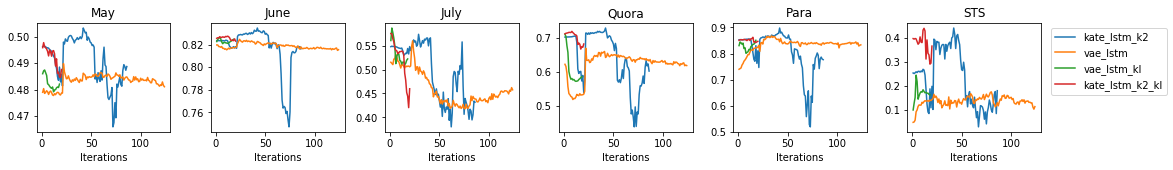

In [321]:
visualise([run1, run2, run3, run4], focus=["May", "June", "July", "Quora", "Para", "STS"])

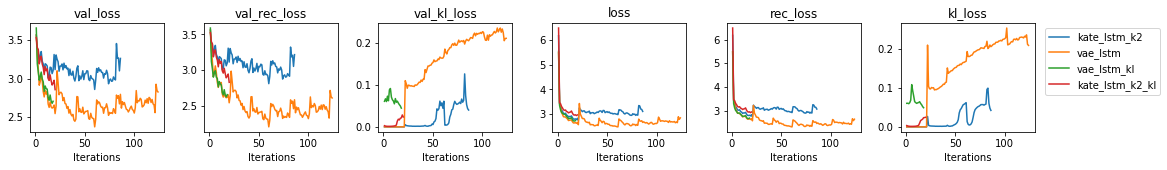

In [322]:
visualise([run1, run2, run3, run4], focus=run1[2][6:])

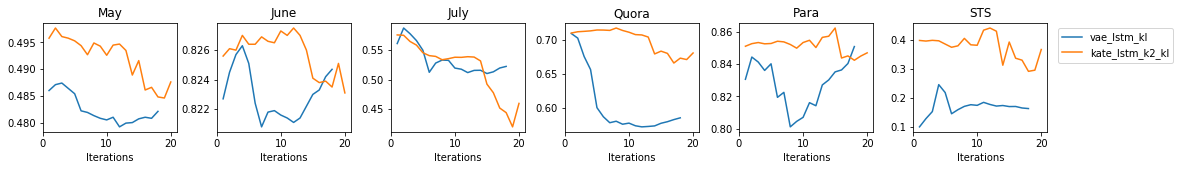

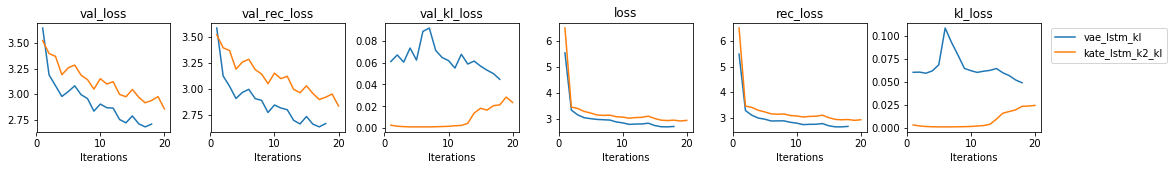

In [323]:
visualise([run3, run4], focus=["May", "June", "July", "Quora", "Para", "STS"])
visualise([run3, run4], focus=run1[2][6:])

# DSSM with LSTM

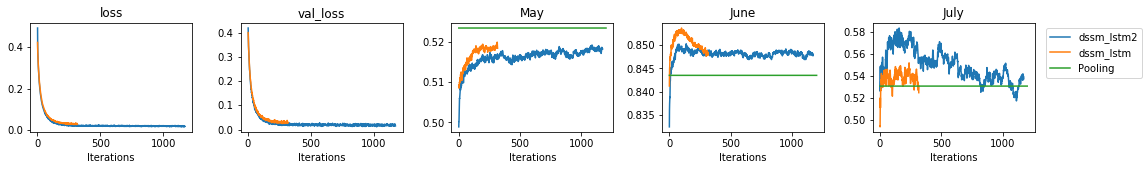

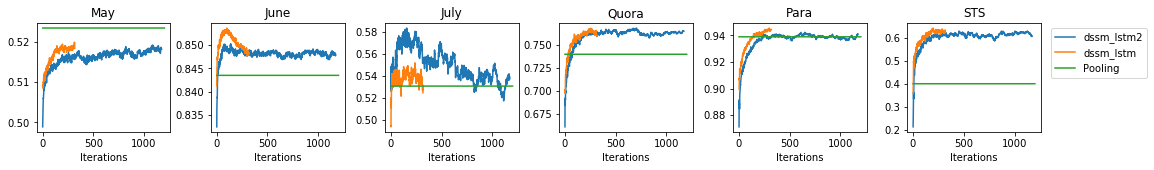

In [439]:
run201 = read_outputs2("/work/data/out/dssm_lstm2_30M_QD_ml15_2018_08_02_21:01:39_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f1c46d20ac8>_50K_BPE", False)
run102 = read_outputs2("/work/data/out/dssm_lstm_30M_QQ_ml15_2018_08_05_03:20:38_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f5bf2445b38>_50K_BPE", False)

visualise([run201, run102, avg])
visualise([run201, run102, avg], focus=["May", "June", "July", "Quora", "Para", "STS"])

In [447]:
for i in range(len(run202[1]['July'])):
    print(i*25600, run202[1]['July'][i])

0 0.4598
25600 0.4823
51200 0.4727
76800 0.4758
102400 0.4573
128000 0.4651
153600 0.491
179200 0.4767
204800 0.4813
230400 0.4786
256000 0.4661
281600 0.4605
307200 0.4549
332800 0.4484
358400 0.4453
384000 0.4465
409600 0.4442
435200 0.4442
460800 0.4357
486400 0.4333
512000 0.4407
537600 0.4328
563200 0.4391
588800 0.4448
614400 0.4588
640000 0.449
665600 0.4594
691200 0.4505
716800 0.4578
742400 0.4536
768000 0.4671
793600 0.4563
819200 0.4639
844800 0.465
870400 0.4603
896000 0.4435
921600 0.4937
947200 0.4722
972800 0.4901
998400 0.4985
1024000 0.4995
1049600 0.4873
1075200 0.4606
1100800 0.4841
1126400 0.4465
1152000 0.5008
1177600 0.5332
1203200 0.4704
1228800 0.5018
1254400 0.5074
1280000 0.5265
1305600 0.4799
1331200 0.4674
1356800 0.4736
1382400 0.5015
1408000 0.4585
1433600 0.4783
1459200 0.4996
1484800 0.4857
1510400 0.5225
1536000 0.4507
1561600 0.4762
1587200 0.4723
1612800 0.4737
1638400 0.4847
1664000 0.4604
1689600 0.4807
1715200 0.4693
1740800 0.4774
1766400 0.465
17

In [ ]:
run205 = read_outputs2("/work/data/out/seq2seq2_30M_QD_ml15_2018_08_02_19:00:27_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7ff61bb56b00>_50K_BPE", False)

run206 = read_outputs2("/work/data/out/ssvaepair_1_30M_QD_ml15_2018_08_03_07:06:34_h200_l200_k2_n1_ml15_w50512_b128_e1_a1.0_<keras.optimizers.Adam object at 0x7f39de5ad3c8>_50K_BPE", False)

run207 = read_outputs2("/work/data/out/kate_avg_30M_QD_ml15_2018_08_03_03:56:59_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7fde9b61b7f0>_50K_BPE", False)
run208 = read_outputs2("/work/data/out/vae_avg_30M_QD_ml15_2018_08_03_03:57:06_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f65ae5beb00>_50K_BPE", False)


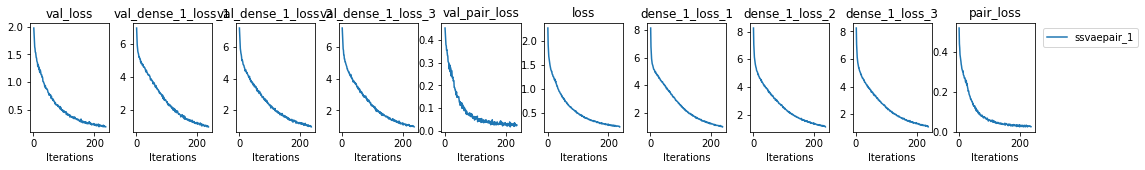

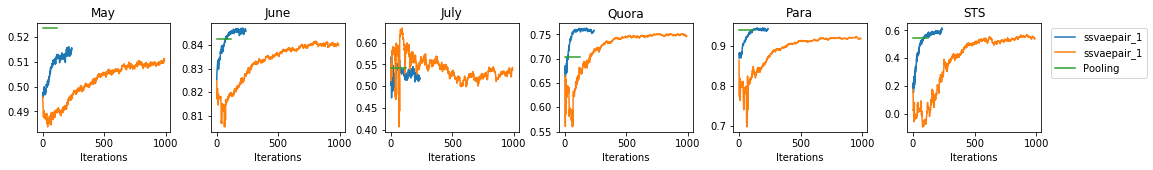

In [416]:
avg = "Pooling", {'July':[0.5428]*120, 'May':[0.5236]*120, 'June':[0.8424]*120, 'loss':[], 'val_loss':[], "Quora":[0.7041]*120, "Para":[0.9388]*120, "STS":[0.5433]*120}

run999 = read_outputs2("/work/data/out/ssvaepair_1_30M_QD_ml15_2018_08_03_17:47:30_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f46c45cbef0>_50K_BPE", False)
run1000 = read_outputs2("/work/data/out/ssvaepair_1_30M_QD_ml15_2018_08_03_18:22:09_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7fa6df537e10>_50K_BPE", False)

visualise([run999], focus=run999[2][6:])
visualise([run999, run1000, avg], focus=run999[2][:6])

# Completed re-implementation of Seq2Seq (SeqVAE)

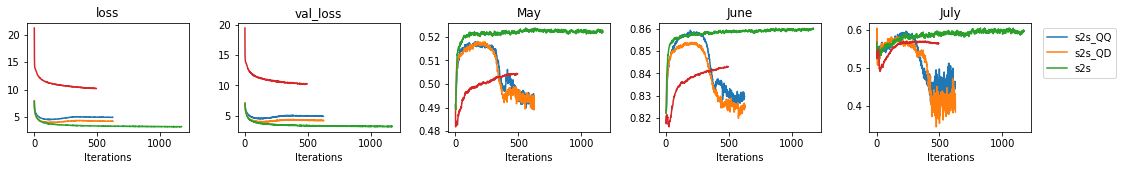

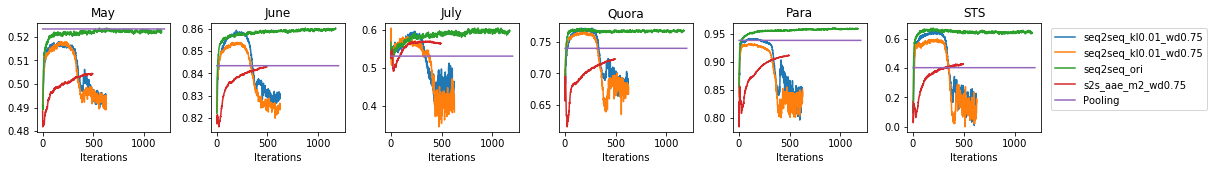

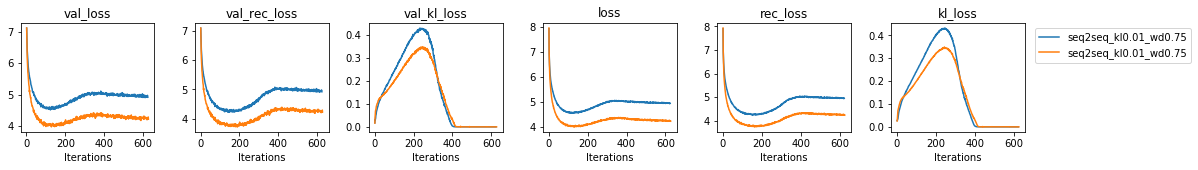

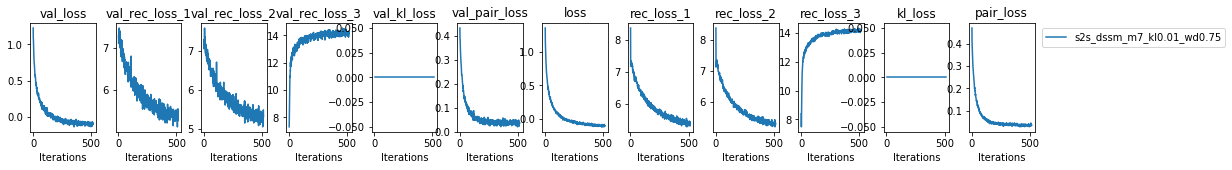

In [494]:
run1 = read_outputs2("/work/data/out/seq2seq_kl0.01_wd0.75_30M_QQ_ml15_2018_08_05_03:30:26_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f8b68dc0eb8>_50K_BPE", False)
run2 = read_outputs2("/work/data/out/seq2seq_kl0.01_wd0.75_30M_QD_ml15_2018_08_05_03:30:51_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f143ef6db70>_50K_BPE", False)
run3 = read_outputs2("/work/data/out/seq2seq_ori_30M_QQ_ml15_2018_08_05_06:56:06_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f6c1afd6be0>_50K_BPE", False)
avg = "Pooling", {'July':[0.5307]*1200, 'May':[0.5234]*1200, 'June':[0.8435]*1200, 'loss':[], 'val_loss':[], "Quora":[0.7403]*1200, "Para":[0.9390]*1200, "STS":[0.4023]*1200}

visualise([run1, run2, run3, run10], legends=["s2s_QQ", "s2s_QD", "s2s"])
visualise([run1, run2, run3, run10, avg], focus=["May", "June", "July", "Quora", "Para", "STS"])
visualise([run1, run2], focus=run1[2][6:])
visualise([run6], focus=run6[2][6:])

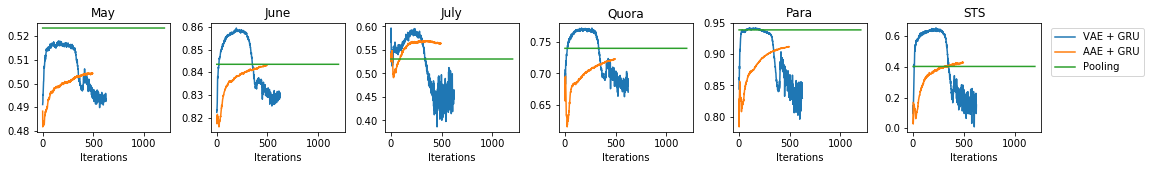

In [470]:
visualise([run1, run10, avg], focus=["May", "June", "July", "Quora", "Para", "STS"], legends=["VAE + GRU", "AAE + GRU", "Pooling"])



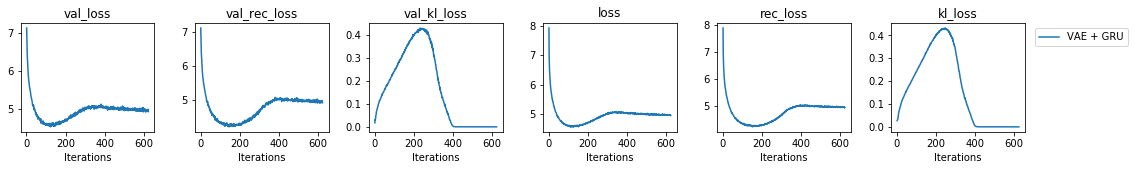

In [472]:
visualise([run1], focus=run1[2][6:], legends=["VAE + GRU"])

# S2S + DSSM

- Old s2s_dssm_m6 has wrong weight loss (-0.05) rather than 0.05

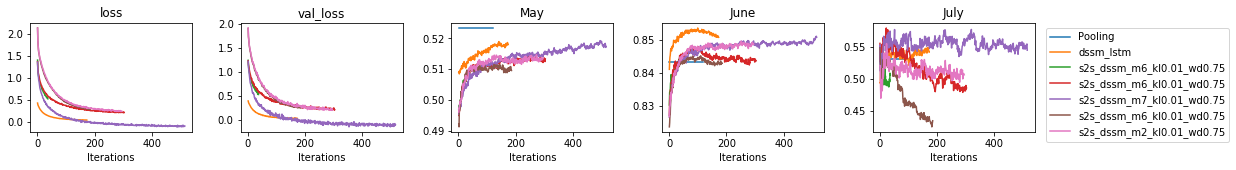

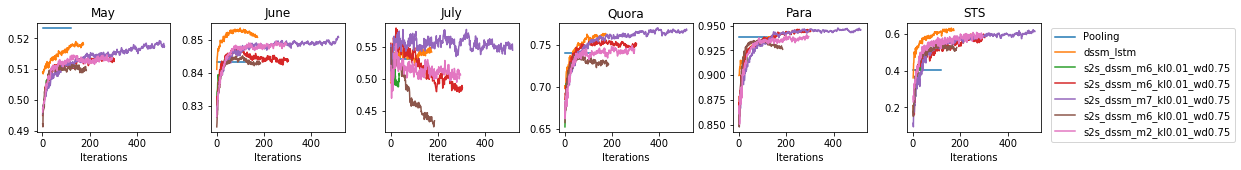

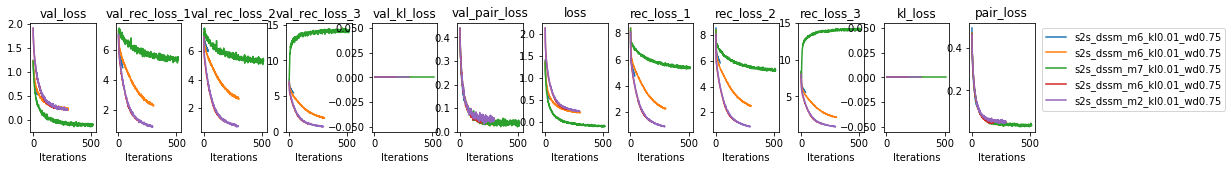

In [432]:
avg = "Pooling", {'July':[0.5307]*120, 'May':[0.5234]*120, 'June':[0.8435]*120, 'loss':[], 'val_loss':[], "Quora":[0.7403]*120, "Para":[0.9390]*120, "STS":[0.4023]*120}


run4 = read_outputs2("/work/data/out/s2s_dssm_m6_kl0.01_wd0.75_30M_QD_ml15_2018_08_05_07:54:23_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f2839de1ba8>_50K_BPE", False)
run5 = read_outputs2("/work/data/out/s2s_dssm_m6_kl0.01_wd0.75_30M_QQ_ml15_2018_08_05_07:54:11_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f78f61e5eb8>_50K_BPE", False)
run6 = read_outputs2("/work/data/out/s2s_dssm_m7_kl0.01_wd0.75_30M_QQ_ml15_2018_08_05_08:02:54_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f45d832bfd0>_50K_BPE", False)
run7 = read_outputs2("/work/data/out/s2s_dssm_m6_kl0.01_wd0.75_30M_QQ_ml15_2018_08_05_09:07:22_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f5f5e195b38>_50K_BPE", False)
run8 = read_outputs2("/work/data/out/s2s_dssm_m2_kl0.01_wd0.75_30M_QQ_ml15_2018_08_05_09:12:36_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7fa877debb38>_50K_BPE", False)

visualise([avg, run102, run4, run5, run6, run7, run8])
visualise([avg, run102, run4, run5, run6, run7, run8], focus=["May", "June", "July", "Quora", "Para", "STS"])
visualise([run4, run5, run6, run7, run8], focus=run4[2][6:])

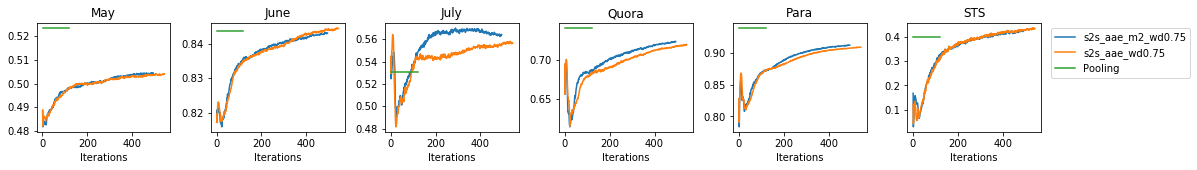

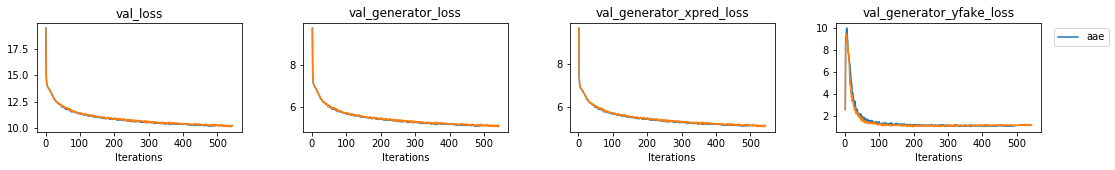

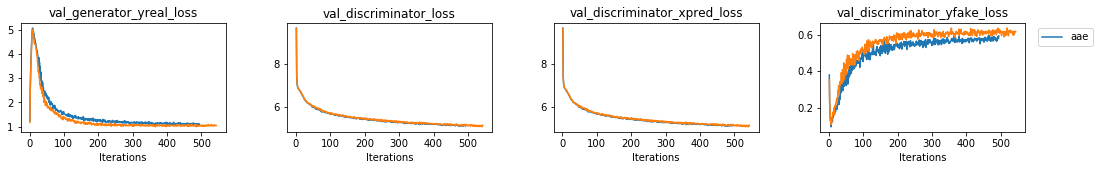

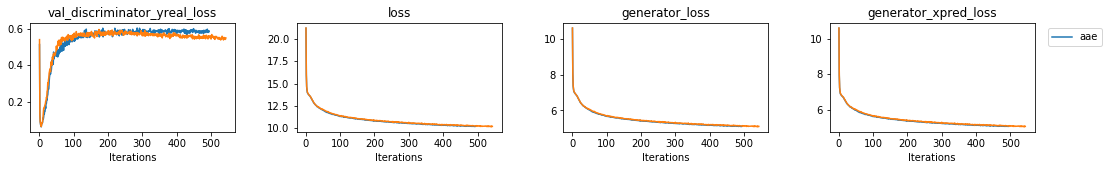

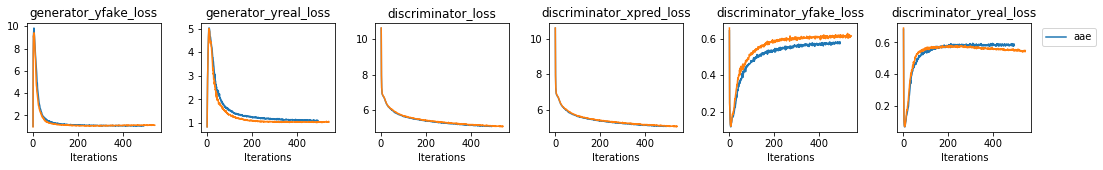

In [435]:
run10 = read_outputs2("/work/data/out/s2s_aae_m2_wd0.75_30M_QQ_ml15_2018_08_05_20:12:25_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f9fde8f5ac8>_50K_BPE", False)
run11 = read_outputs2("/work/data/out/s2s_aae_wd0.75_30M_QQ_ml15_2018_08_05_20:12:07_h200_l200_k2_n1_ml15_w50512_b256_e1_a1.0_<keras.optimizers.Adam object at 0x7f814f906978>_50K_BPE", False)



visualise([run10, run11,  avg], focus=["May", "June", "July", "Quora", "Para", "STS"])

visualise([run10, run11], focus=run10[2][6:10], legends=['aae'])
visualise([run10, run11], focus=run10[2][10:14], legends=['aae'])
visualise([run10, run11], focus=run10[2][14:18], legends=['aae'])
visualise([run10, run11], focus=run10[2][18:], legends=['aae'])

# 100K QQ dataset Experiments on DSSM

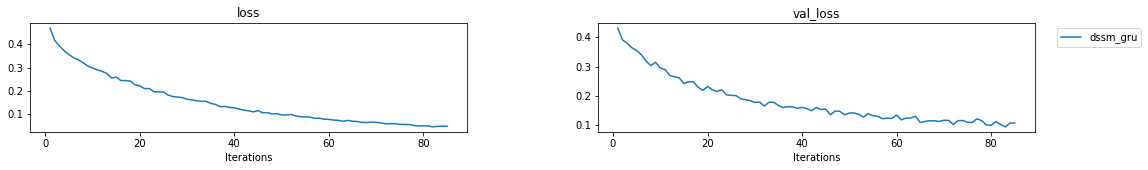

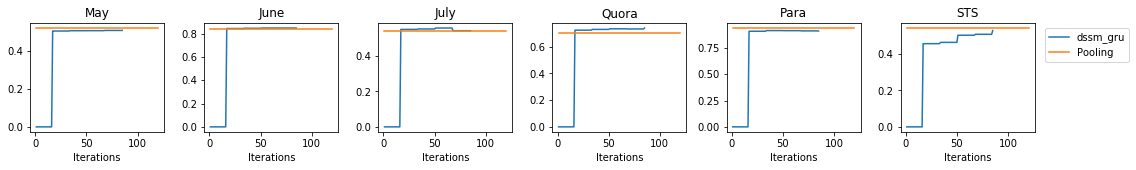

In [461]:
avg = "Pooling", {'July':[0.5428]*120, 'May':[0.5236]*120, 'June':[0.8424]*120, 'loss':[], 'val_loss':[], "Quora":[0.7041]*120, "Para":[0.9388]*120, "STS":[0.5433]*120}

run30 = read_outputs2("/work/data/out/dssm_gru_100K_QQ_ml15_2018_08_06_18:37:04_h200_l200_k2_n1_ml15_w50512_b64_e5_a1.0_<keras.optimizers.Adam object at 0x7fd05a866b38>_50K_BPE", False)
visualise([run30], focus=['loss', 'val_loss'])
visualise([run30, avg], focus=["May", "June", "July", "Quora", "Para", "STS"])



# Experiments on VAE, WAE, AAE and S2S models

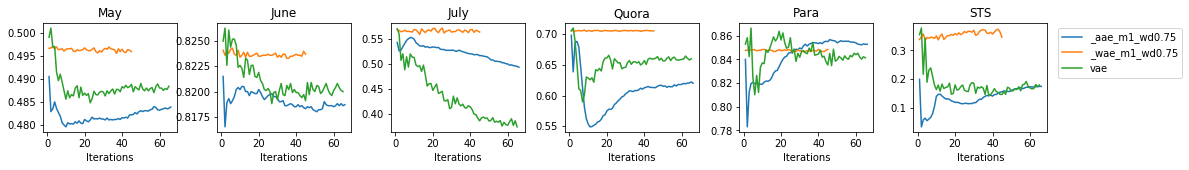

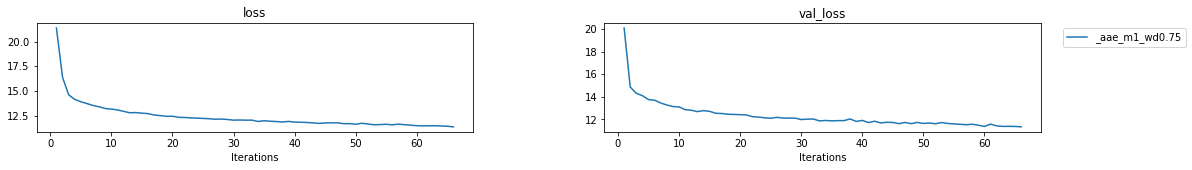

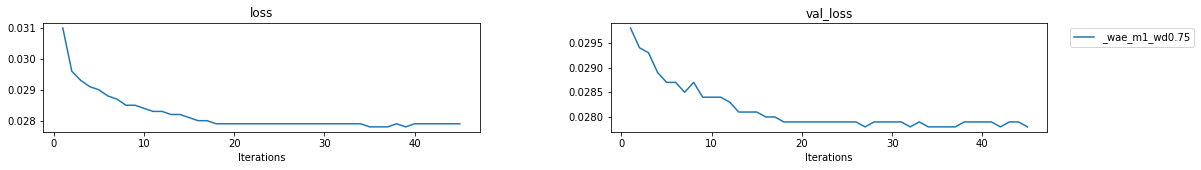

In [529]:
run40 = read_outputs2("/work/data/out/_aae_m1_wd0.75_30M_QQ_ml15_2018_08_06_19:19:13_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f6df5317b70>_50K_BPE", False)
run41 = read_outputs2("/work/data/out/_wae_m1_wd0.75_30M_QQ_ml15_2018_08_06_19:02:21_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f563b487ef0>_50K_BPE", False)
run42 = read_outputs2("/work/data/out/vae_30M_QQ_ml15_2018_08_06_22:53:31_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f1d433b3898>_50K_BPE", False)
run43 = read_outputs2("/work/data/out/vae_kl_30M_QQ_ml15_2018_08_06_22:58:45_h200_l200_k2_n1_ml15_w50512_b64_e1_a1.0_<keras.optimizers.Adam object at 0x7f6d42a9cac8>_50K_BPE", False)

visualise([run40, run41, run42], focus=["May", "June", "July", "Quora", "Para", "STS"])
visualise([run40], focus=['loss', 'val_loss'])
visualise([run41], focus=['loss', 'val_loss'])


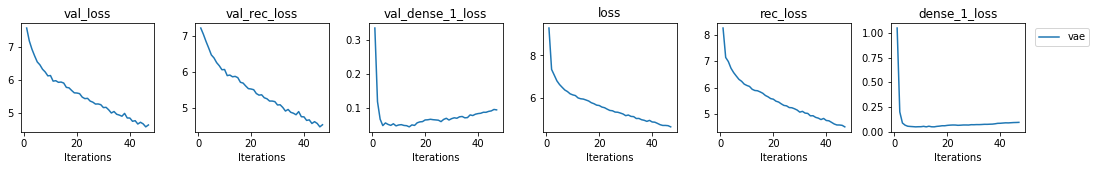

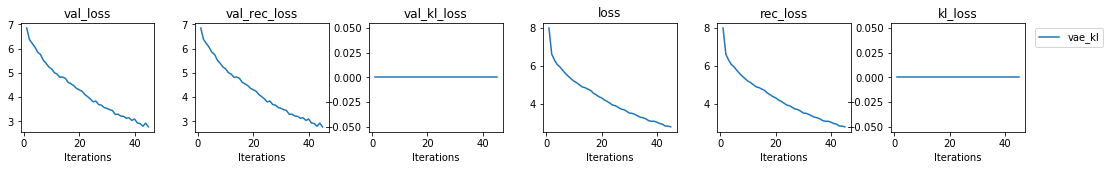

In [512]:
visualise([run42], focus=run42[2][6:])
visualise([run43], focus=run43[2][6:])


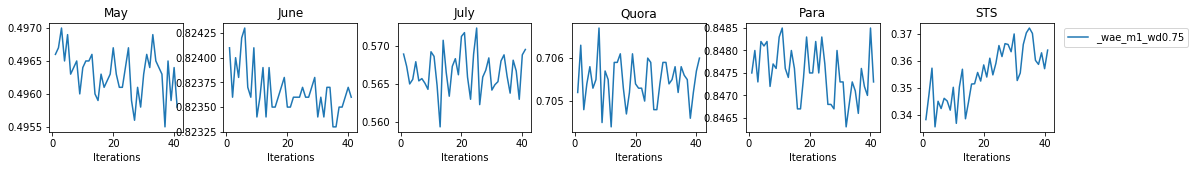

In [501]:
visualise([run41], focus=["May", "June", "July", "Quora", "Para", "STS"])


AAE


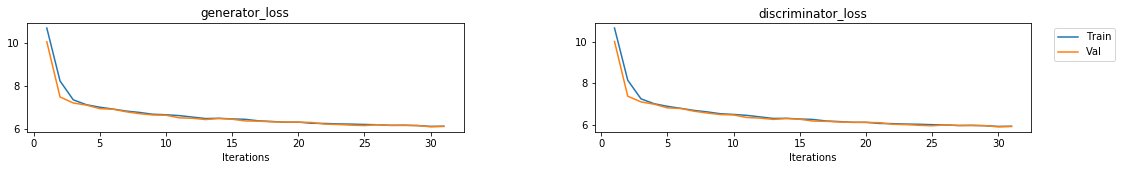

WAE


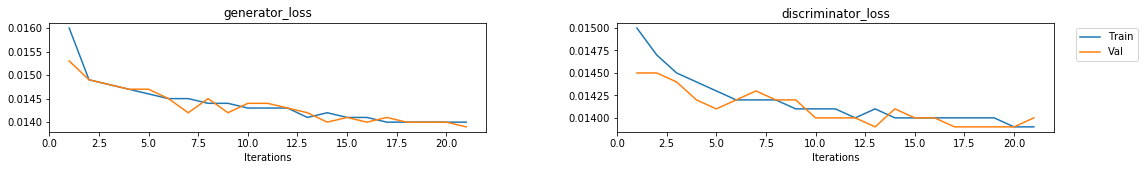

In [490]:
print("AAE")
visualise_train_val(run40, ['generator_loss', 'discriminator_loss'], ['val_generator_loss', 'val_discriminator_loss'])

print("WAE")
visualise_train_val(run41, ['generator_loss', 'discriminator_loss'], ['val_generator_loss', 'val_discriminator_loss'])
